# Week 2 Coding Presentation (Sam Cong)

## Load modules

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import numpy as np
import seaborn as sns
import sklearn.manifold
import spacy
import nltk

%matplotlib inline

## Load helper functions for this homework

In [2]:
import helper_functions

## <span style="color:#9addbd">**Exercise 1**</span>

<span style="color:#9addbd">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question.</span>

In [3]:
nlp = spacy.load("en_core_web_sm")

For this week's exercise, I used Semantic Scholar API ([https://github.com/allenai/s2-folks](URL)) to extract the abstract of a small sample of psychology academic papers.

<span style="color:#589cb4;"> Note: Serving merely roughtly as a skeleton code for the (tentatative) final project, the following code did not impose sufficient filtering conditions (e.g., article type, publication year) to scrape the articles. </span>

In [4]:
# The S2 API Key used to fetch articles
api_key = 'KOyXiGdu4t38zFJFFyuKF5jQGBGdxCSfDICseepg'
headers = {"x-api-key": api_key}

In [5]:
# Define the paper search endpoint URL
url = 'https://api.semanticscholar.org/graph/v1/paper/search'

# Define the search parameters
query_params = {
    'query': 'relevant search term',
    'fieldsOfStudy': 'Psychology',  # Search term
    'fields': 'title,authors,abstract',  # Fetching title and abstract
    'limit': 100  # Number of results to return
}

response = requests.get(url, headers=headers, params=query_params)

abstract_corpus_df = {"Title": [],
                      "Author": [],
                      "Abstract": []}

# Check if the request was successful
if response.status_code == 200:
    papers = response.json().get('data', [])
    for paper in papers:
        title = paper.get('title')
        author = paper.get('authors')
        abstract = paper.get('abstract')

        # Skip articles with missing info
        if not title or not author or not abstract:
            continue

        author_names = ', '.join([a['name'] for a in author])

        abstract_corpus_df["Title"].append(title)
        abstract_corpus_df["Author"].append(author_names)
        abstract_corpus_df["Abstract"].append(abstract)
else:
    print(f"Request failed with status code {response.status_code}")

abstract_corpus_df = pd.DataFrame(abstract_corpus_df)

abstract_corpus_df.head()

,Title,Author,Abstract
0,The Control of Single-color and Multiple-color...,"A. Grubert, N. Carlisle, M. Eimer",The question whether target selection in visua...
1,Non-pharmacologic and pharmacologic treatments...,"K. Atchison, J. Watt, Delaney Ewert, A. Toohey...",BACKGROUND\nolder adults living in long-term c...
2,"Confirmation bias in information search, inter...","Dáša Vedejová, V. Čavojová",Abstract Confirmation bias is often used as an...
3,Meta-analysis on the long-term effectiveness o...,"A. Hilbert, D. Petroff, S. Herpertz, R. Pietro...",OBJECTIVE\nLong-term effectiveness is a critic...
4,On the search for a selective and retroactive ...,"F. Kalbe, L. Schwabe",Storing motivationally salient experiences pre...


Update the <span style="color:#e17070;">clean_raw_text</span> function about the unicode part:

In [6]:
abstract_corpus_df['Cleaned_Abstract'] = abstract_corpus_df['Abstract'].apply(lambda x: helper_functions.clean_raw_text_updated([x])[0])
abstract_corpus_df['Cleaned_Abstract'].head()

0    The question whether target selection in visua...
1    BACKGROUND\nolder adults living in long-term c...
2    Abstract Confirmation bias is often used as an...
3    OBJECTIVE\nLong-term effectiveness is a critic...
4    Storing motivationally salient experiences pre...
Name: Cleaned_Abstract, dtype: object

In [7]:
abstract_corpus_df["Abstract_Token"] = abstract_corpus_df['Cleaned_Abstract'].apply(lambda x: helper_functions.word_tokenize(x))
abstract_corpus_df["Abstract_Token"].head()

0    [The, question, whether, target, selection, in...
1    [BACKGROUND, older, adults, living, in, long, ...
2    [Abstract, Confirmation, bias, is, often, used...
3    [OBJECTIVE, Long, term, effectiveness, is, a, ...
4    [Storing, motivationally, salient, experiences...
Name: Abstract_Token, dtype: object

In [8]:
# abstract_corpus_token as a whole
abstract_corpus_token = abstract_corpus_df["Abstract_Token"].sum()
abstract_corpus_token[:50]

['The',
 'question',
 'whether',
 'target',
 'selection',
 'in',
 'visual',
 'search',
 'can',
 'be',
 'effectively',
 'controlled',
 'by',
 'simultaneous',
 'attentional',
 'templates',
 'for',
 'multiple',
 'features',
 'is',
 'still',
 'under',
 'dispute',
 'We',
 'investigated',
 'whether',
 'multiple',
 'color',
 'attentional',
 'guidance',
 'is',
 'possible',
 'when',
 'target',
 'colors',
 'remain',
 'constant',
 'and',
 'can',
 'thus',
 'be',
 'represented',
 'in',
 'long',
 'term',
 'memory',
 'but',
 'not',
 'when',
 'they']

In [9]:
# Construct the nltk Text object
abstract_corpus_Text = nltk.Text(abstract_corpus_token)

After constructing the nltk Text object, I randomly selected the keyword <span style="color:#589cb4;">memory</span>, which is big topic in psychology, and mainly used it for exploratory analysis with the following methods:
- <span style="color:#e17070;">text.count()</span>: counting the number of times this word appears in the text;
- <span style="color:#e17070;">text.concordance()</span>: finding all occurrences of the target word in the text and displaying them accompanied by their immediate context;
- <span style="color:#e17070;">text.similar()</span>: finding other words which appear in the same contexts as the specified word; listing most similar words first (similarity for distributional similarity);
- <span style="color:#e17070;">text.common_contexts()</span>: finding contexts where the specified words appear; listing most frequent common contexts first;
- <span style="color:#e17070;">text.dispersion_plot</span>: producing a plot showing the distribution of the words through the text;
- <span style="color:#e17070;">text.collocations()</span>: printing collocations derived from the text, ignoring stopwords.

Reference: [https://www.nltk.org/api/nltk.text.Text.html](URL)

In [10]:
abstract_corpus_Text.count("memory")

74

In [11]:
abstract_corpus_Text.concordance('memory', lines=10)

Displaying 10 of 74 matches:
an thus be represented in long term memory but not when they change frequently
ntly and have to be held in working memory Participants searched for one two o
in amplitude as a function of color memory load in variable color blocks which
 target colors were held in working memory In constant color blocks the CDA wa
 were primarily stored in long term memory N2pc components to targets were mea
and can be represented in long term memory and when they change across trials 
re have to be maintained in working memory BACKGROUND older adults living in l
earches evidence interpretation and memory recall are the three main component
s did not show confirmation bias in memory recall as there was no difference i
riences preferentially in long term memory is generally adaptive Although such


In [12]:
abstract_corpus_Text.similar("memory", num=10)

visual effectiveness cognitive follow illness in is color same care


In [13]:
abstract_corpus_Text.common_contexts(['memory'], num=10)

working_capacity term_is term_but working_in retroactive_enhancement
retroactive_effect working_to term_may term_in working_and


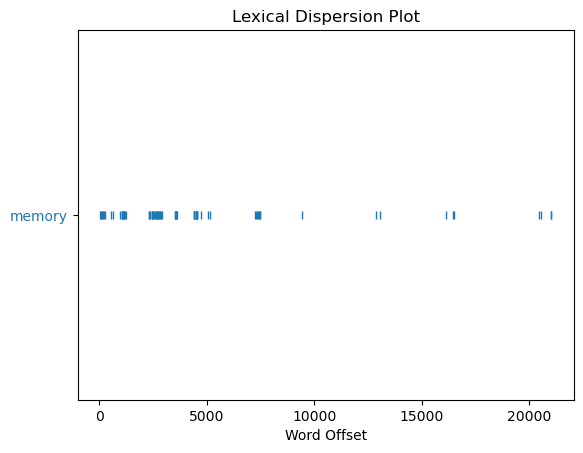

In [14]:
abstract_corpus_Text.dispersion_plot(["memory"])

In [15]:
abstract_corpus_Text.collocations(num=10)

long term; embryo transfer; working memory; short term; inclusion
criteria; mental health; term memory; rapid cycling; bipolar disorder;
double embryo


## <span style="color:#9addbd">**Exercise 2**</span>

<span style="color:#9addbd">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

First, I will create <span style="color:#e17070;">normalized tokens</span> for the abstract corpus.

In [16]:
abstract_countsDict = {}
for word in abstract_corpus_token:
    # For filtering words, I chose to use lowercase words
    word_lowercase = word.lower()
    if word_lowercase in abstract_countsDict:
        abstract_countsDict[word_lowercase] += 1
    else:
        abstract_countsDict[word_lowercase] = 1
abstract_countsDict = sorted(abstract_countsDict.items(), key = lambda x : x[1], reverse = True)
abstract_countsDict[:20]

[('the', 882),
 ('and', 783),
 ('of', 773),
 ('in', 507),
 ('to', 465),
 ('a', 324),
 ('for', 258),
 ('with', 228),
 ('were', 202),
 ('on', 175),
 ('that', 168),
 ('studies', 157),
 ('search', 156),
 ('is', 152),
 ('or', 150),
 ('term', 140),
 ('was', 135),
 ('are', 104),
 ('long', 95),
 ('we', 94)]

In [17]:
abstract_corpus_token_normalized = helper_functions.normalizeTokens(abstract_corpus_token)

In [18]:
print("Number of tokens for the abstract corpus: {}".format(len(abstract_corpus_token)))
print("Number of normalized tokens for the abstract corpus: {}".format(len(abstract_corpus_token_normalized)))

Number of tokens for the abstract corpus: 21069
Number of normalized tokens for the abstract corpus: 12611


Then, I will construct the <span style="color:#589cb4;">word frequency distribution</span> and <span style="color:#589cb4;">word probability distribution</span>.

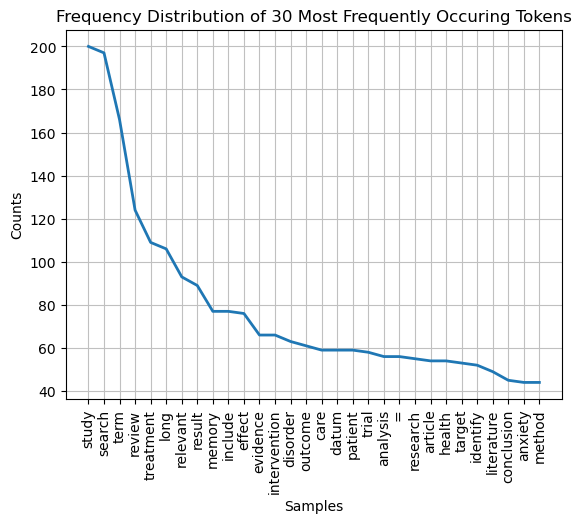

<Axes: title={'center': 'Frequency Distribution of 30 Most Frequently Occuring Tokens'}, xlabel='Samples', ylabel='Counts'>

In [19]:
abstract_corpus_fdist = nltk.FreqDist(abstract_corpus_token_normalized)
abstract_corpus_fdist.plot(30, title='Frequency Distribution of 30 Most Frequently Occuring Tokens', cumulative=False)

Text(0.5, 1.0, 'Probability Distribution of 30 Most Frequently Occurring Tokens')

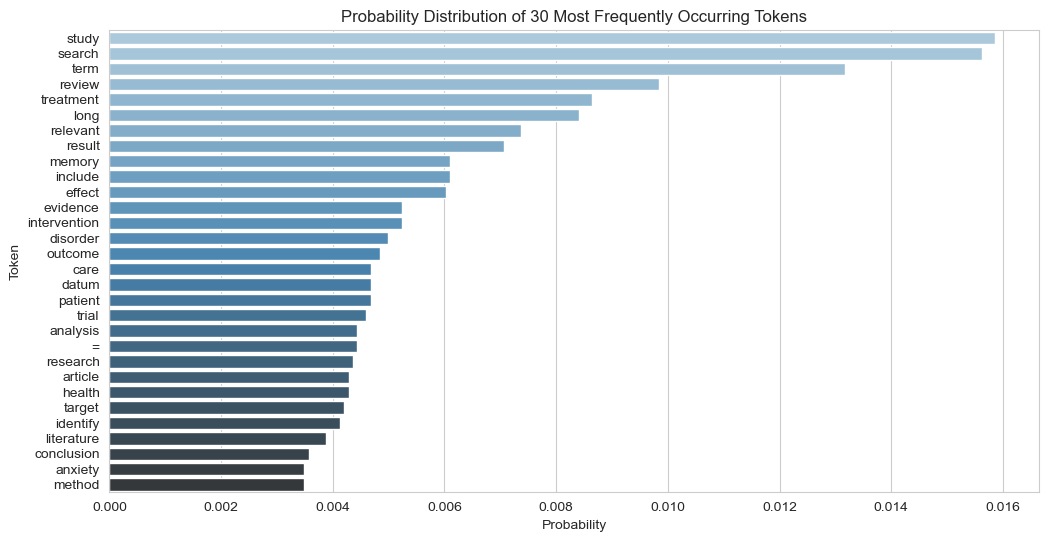

In [20]:
total_token_count = len(abstract_corpus_token_normalized)

# Here, I choose the 30 most frequently occuring tokrns
sample_token = sorted(abstract_corpus_fdist.items(), 
                      key=lambda item: item[1], reverse=True)[:30]

# Calculate probabilities
sample_token_list, prob_list = zip(*[(token, freq / total_token_count) for token, freq in sample_token])
df = pd.DataFrame({
    'Token': sample_token_list,
    'Probability': prob_list
})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Probability', y='Token', data=df, palette="Blues_d", orient="h")
plt.title('Probability Distribution of 30 Most Frequently Occurring Tokens')

Then, I will construct two <span style="color:#e17070;">conditional probability distributions</span>.

In [21]:
abstract_corpus_token_normalized_POS = nltk.pos_tag(abstract_corpus_token_normalized)
abstract_corpus_token_normalized_POS[:10]

[('question', 'NN'),
 ('target', 'NN'),
 ('selection', 'NN'),
 ('visual', 'JJ'),
 ('search', 'NN'),
 ('effectively', 'RB'),
 ('control', 'VBP'),
 ('simultaneous', 'JJ'),
 ('attentional', 'JJ'),
 ('template', 'NN')]

In [22]:
# Generate the conditional frequency distribution (with POS tag as the feature)
abstract_corpus_cpfist_WordtoPOS = nltk.ConditionalFreqDist((pos, word) for word, pos in abstract_corpus_token_normalized_POS)

# Transform the conditional frequency distribution into conditional probability distribution
abstract_corpus_cpdist_WordtoPOS = nltk.ConditionalProbDist(abstract_corpus_cpfist_WordtoPOS, nltk.ELEProbDist)

First <span style="color:#e17070;">conditional probability distributions</span> focuses on "NN" POS tag.

Text(0, 0.5, 'Tokens')

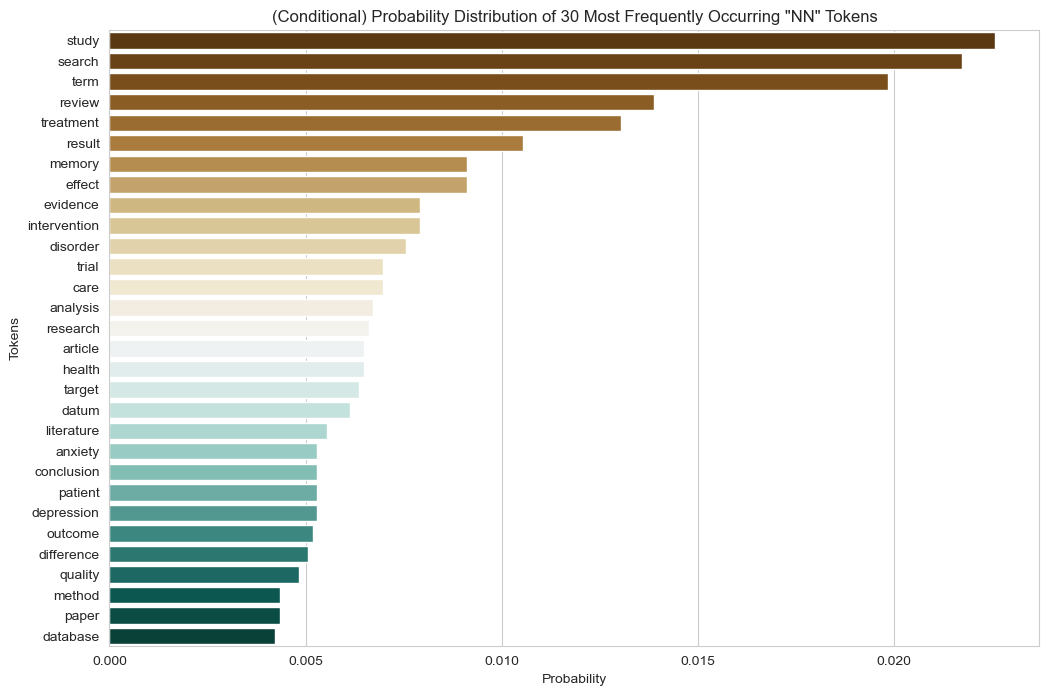

In [23]:
nn_token_probs = [(token, abstract_corpus_cpdist_WordtoPOS['NN'].prob(token)) 
                 for token in abstract_corpus_cpdist_WordtoPOS['NN'].samples()]

# Sort by probability and take the top 30
top_30_nn_tokens = sorted(nn_token_probs, key=lambda x: x[1], reverse=True)[:30]

# Extract words and probabilities for plotting
token, probabilities = zip(*top_30_nn_tokens)

df = pd.DataFrame({
    'Token': token,
    'Probability': probabilities
})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Probability', y='Token', data=df, palette="BrBG", orient='h')
plt.title('(Conditional) Probability Distribution of 30 Most Frequently Occurring "NN" Tokens')
plt.xlabel('Probability')
plt.ylabel('Tokens')

Second <span style="color:#e17070;">conditional probability distributions</span> focuses on "JJ" POS tag.

Text(0, 0.5, 'Tokens')

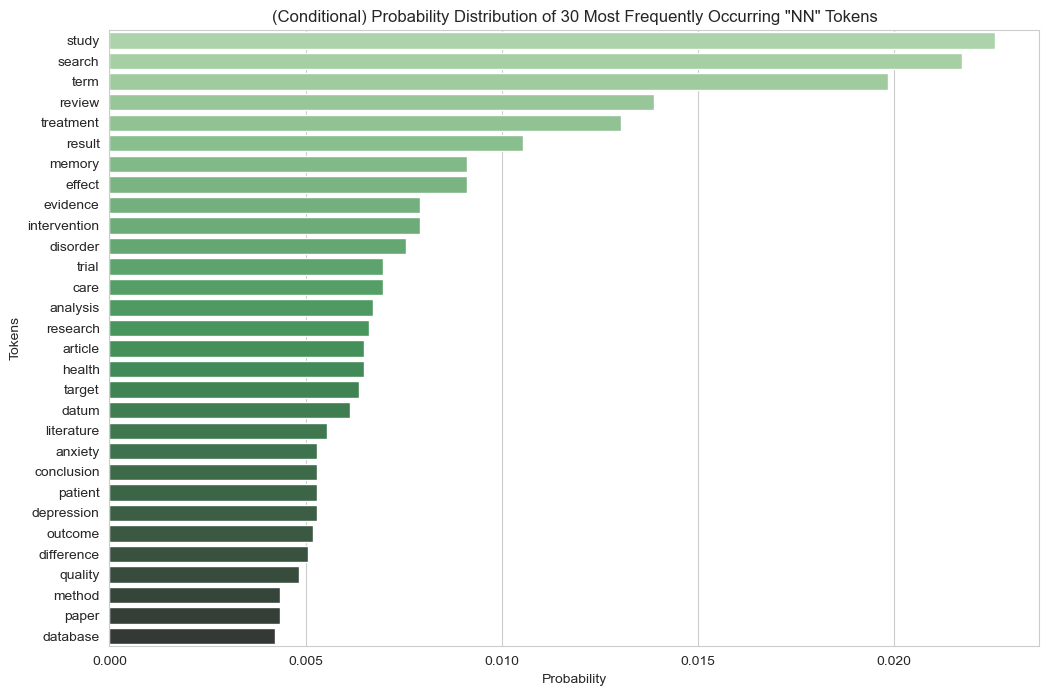

In [24]:
jj_token_probs = [(token, abstract_corpus_cpdist_WordtoPOS['JJ'].prob(token)) 
                 for token in abstract_corpus_cpdist_WordtoPOS['JJ'].samples()]

# Sort by probability and take the top 30
top_30_jj_tokens = sorted(nn_token_probs, key=lambda x: x[1], reverse=True)[:30]

token, probabilities = zip(*top_30_jj_tokens)

df = pd.DataFrame({
    'Token': token,
    'Probability': probabilities
})

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Probability', y='Token', data=df, palette="Greens_d", orient='h')
plt.title('(Conditional) Probability Distribution of 30 Most Frequently Occurring "NN" Tokens')
plt.xlabel('Probability')
plt.ylabel('Tokens')

Finally, create a <span style="color:#589cb4;">WORD CLOUD</span>. 

(-0.5, 499.5, 499.5, -0.5)

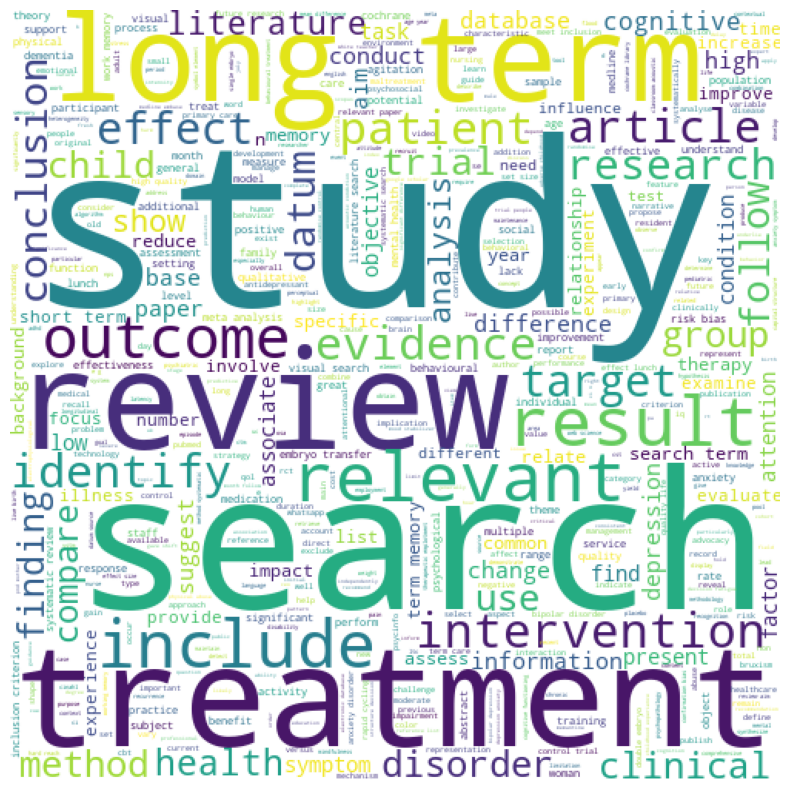

In [25]:
abstract_corpus_token_wc = wordcloud.WordCloud(
    background_color="white", max_words=500, width= 1000, height = 1000, 
    mode ='RGBA', scale=.5).generate(' '.join(abstract_corpus_token_normalized))

# Display the generated word cloud:
plt.figure(figsize=(10, 10))
plt.imshow(abstract_corpus_token_wc)
plt.axis("off") 

## <span style="color:#9addbd">**Exercise 3**</span>

<span style="color:#9addbd">Perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?</span>

In [26]:
abstract_corpus_df['Sentence'] = abstract_corpus_df["Cleaned_Abstract"].apply(lambda x: [helper_functions.word_tokenize(s) for s in helper_functions.sent_tokenize(x)])

In [27]:
abstract_corpus_df['Sentence'].head()

0    [[The, question, whether, target, selection, i...
1    [[BACKGROUND, older, adults, living, in, long,...
2    [[Abstract, Confirmation, bias, is, often, use...
3    [[OBJECTIVE, Long, term, effectiveness, is, a,...
4    [[Storing, motivationally, salient, experience...
Name: Sentence, dtype: object

In [28]:
abstract_corpus_df['POS_Sentence'] = abstract_corpus_df['Sentence'].apply(lambda x: helper_functions.tag_sents_pos(x))

In [29]:
abstract_corpus_df['POS_Sentence'].head()

0    [[(The, DT), (question, NN), (whether, IN), (t...
1    [[(BACKGROUND, NN), (older, JJR), (adults, NNS...
2    [[(Abstract, NNP), (Confirmation, NNP), (bias,...
3    [[(OBJECTIVE, NNP), (Long, JJ), (term, NN), (e...
4    [[(Storing, VBG), (motivationally, RB), (salie...
Name: POS_Sentence, dtype: object

Examine the list of words associated with at least three POS tags:

- Common nouns

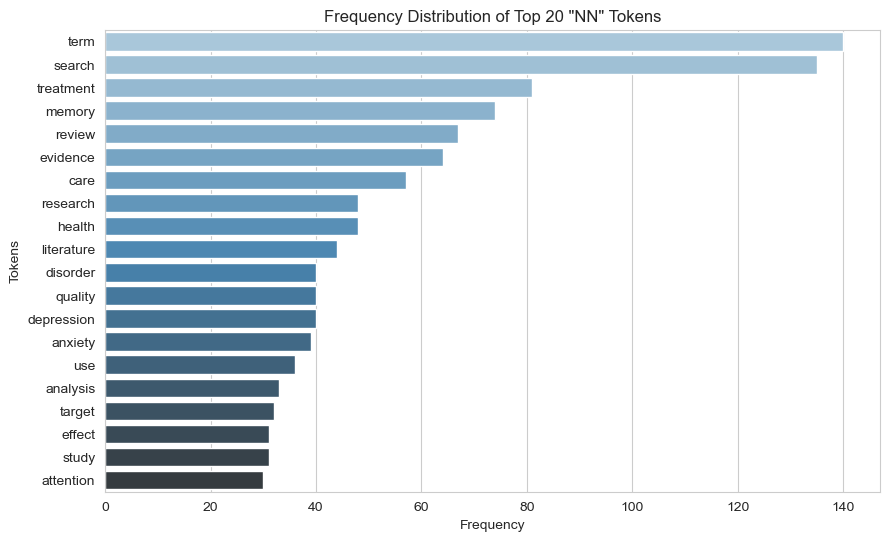

In [30]:
NN_FreqDist = helper_functions.find_POS(abstract_corpus_df, "NN", 20)

- Adjectives

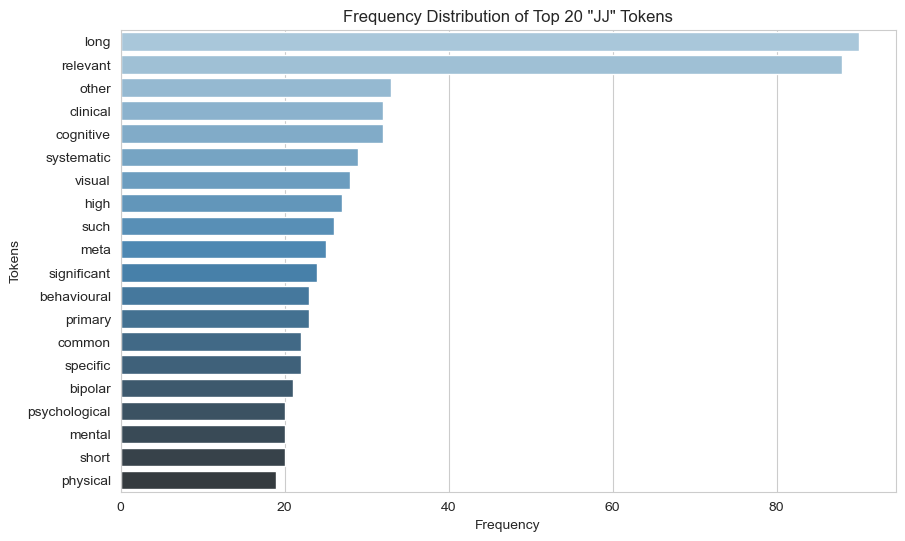

In [31]:
JJ_FreqDist = helper_functions.find_POS(abstract_corpus_df, "JJ", 20)

- Verbs

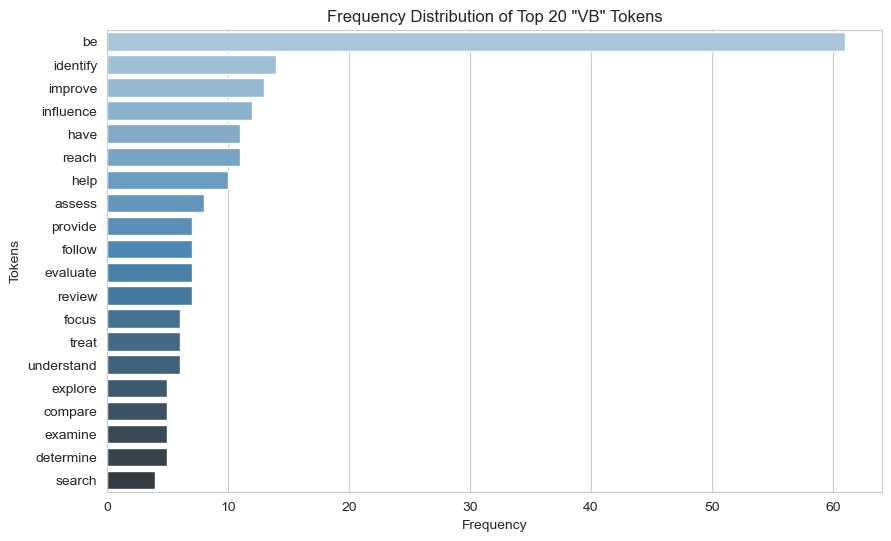

In [32]:
VB_FreqDist = helper_functions.find_POS(abstract_corpus_df, "VB", 20)

- Adverbs

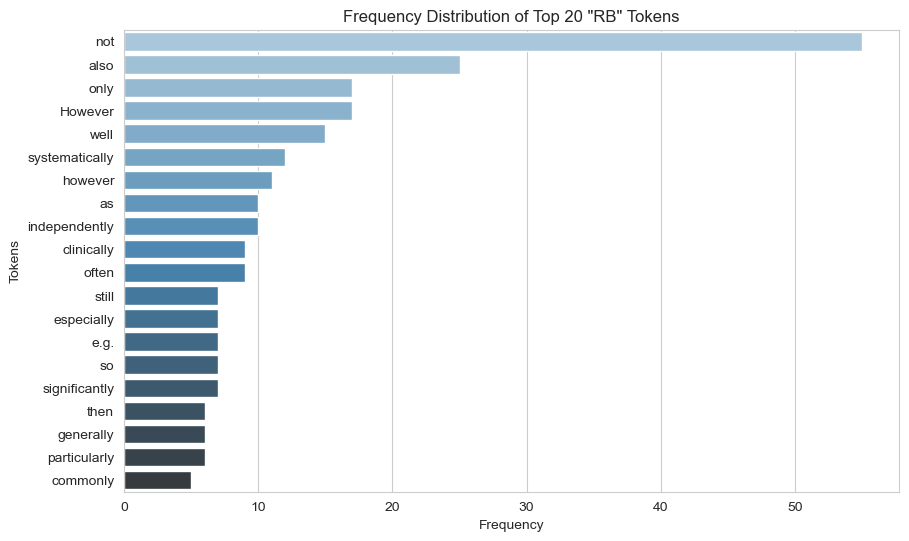

In [33]:
RB_FreqDist = helper_functions.find_POS(abstract_corpus_df, "RB", 20)

Consider conditional associations:

- Adjectives and Common Nouns

In [34]:
jj_nn = helper_functions.find_conditional_associations(abstract_corpus_df, ("JJ", "NN"))
jj_nn[:10]

[(('long', 'term'), 88),
 (('short', 'term'), 19),
 (('visual', 'search'), 14),
 (('mental', 'health'), 14),
 (('bipolar', 'disorder'), 13),
 (('systematic', 'review'), 10),
 (('meta', 'analysis'), 10),
 (('rapid', 'cycling'), 10),
 (('systematic', 'search'), 9),
 (('high', 'quality'), 9)]

- Adverbs and Adjectives

In [35]:
JJ_NN_cfdist = helper_functions.find_conditional_associations(abstract_corpus_df, ("RB", "JJ"))
JJ_NN_cfdist[:10]

[(('clinically', 'relevant'), 4),
 (('potentially', 'relevant'), 3),
 (('medically', 'ill'), 3),
 (('clinically', 'significant'), 3),
 (('statistically', 'significant'), 2),
 (('currently', 'available'), 2),
 (('highly', 'flexible'), 2),
 (('spatially', 'specific'), 2),
 (('very', 'low'), 2),
 (('however', 'significant'), 1)]

## <span style="color:#9addbd">**Exercise 4**</span>

<span style="color:#9addbd"> Identify statistically significant bigrams and trigrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?</span>

In [36]:
whReleases = helper_functions.getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse', maxFiles = 10)
whReleases['tokenized_text'] = whReleases['text'].apply(lambda x: helper_functions.word_tokenize(x))
whReleases['word_counts'] = whReleases['tokenized_text'].apply(lambda x: len(x))
whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: helper_functions.normalizeTokens(x))
whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))

In [37]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())

In [38]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [39]:
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())

In [40]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

Here, I use <span style="color:#e17070;">student t test</span> to determine whether the ngrams and skipgrams are statistically significant.

In addition, for the critical value for the test, I use the critical value for $\alpha = 0.05$.

- Statistically significant <span style="color:#589cb4;">bigrams</span>

In [41]:
t_critical_bigram = helper_functions.find_t_critical(whBigrams.N)

whBigrams_significant = [i for i, j in whBigrams.score_ngrams(bigram_measures.student_t) if j >= t_critical_bigram]

whBigrams_significant

[('president', 'bush'),
 ('rhode', 'island'),
 ('stem', 'cell'),
 ('sheldon', 'whitehouse'),
 ('whitehouse', 'd'),
 ('d', 'r.i'),
 ('u.s', 'senator'),
 ('bush', 'administration'),
 ('whitehouse', 'say'),
 ('united', 'states'),
 ('senator', 'sheldon'),
 ('american', 'people'),
 ('bring', 'troop'),
 ('troop', 'home'),
 ('cell', 'research'),
 ('sen', 'whitehouse'),
 ('jack', 'reed'),
 ('come', 'home'),
 ('d', 'ri')]

In [42]:
# Find out conditional frequency distribution for bigrams
bigram_cfd = nltk.ConditionalFreqDist(nltk.bigrams(whReleases['normalized_tokens'].sum()))

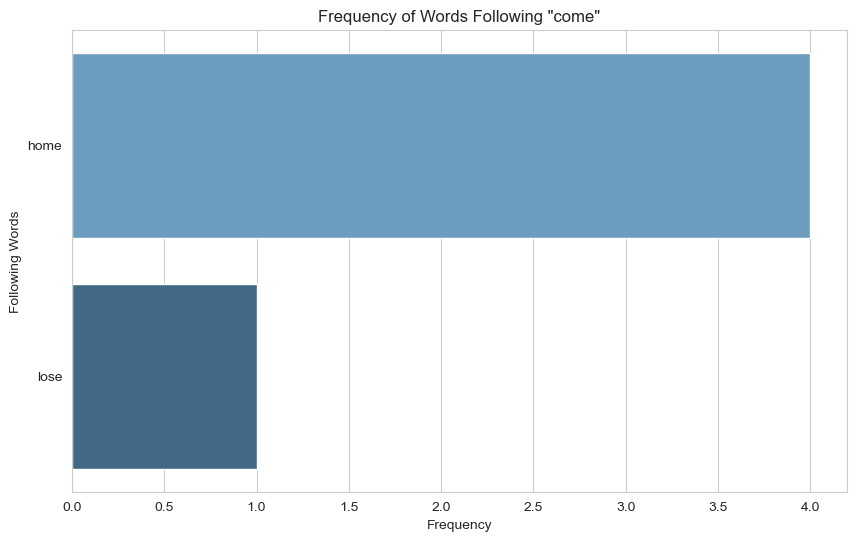

In [43]:
helper_functions.plot_ngram_frequencies(("come"), bigram_cfd)

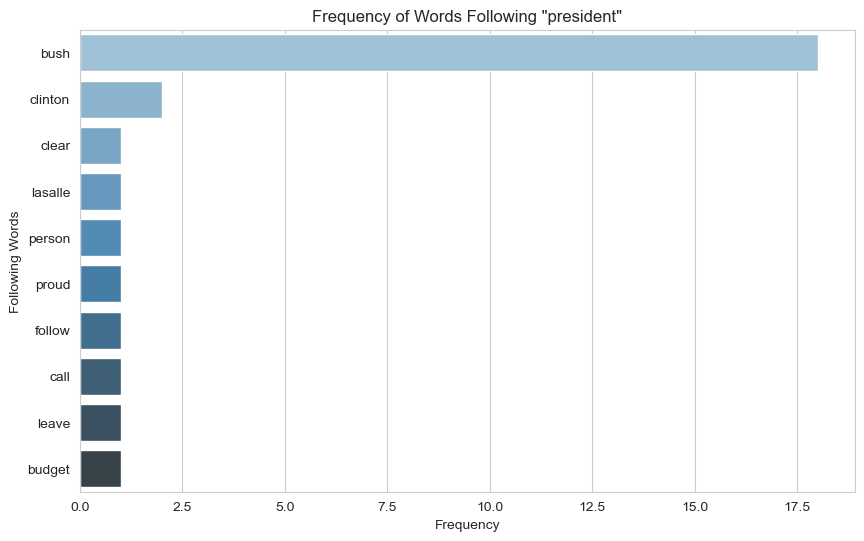

In [44]:
helper_functions.plot_ngram_frequencies(("president"), bigram_cfd)

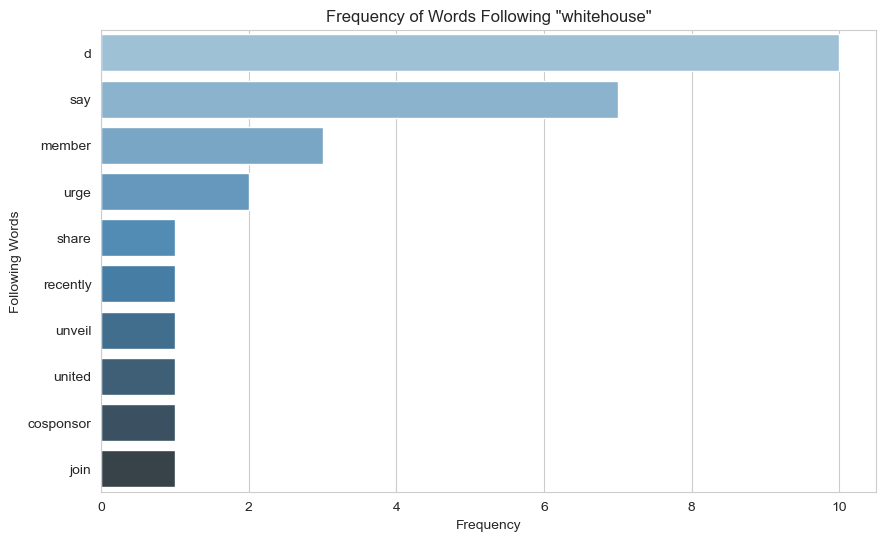

In [45]:
helper_functions.plot_ngram_frequencies(("whitehouse"), bigram_cfd)

- Statistically significant <span style="color:#589cb4;">trigrams</span>

In [46]:
t_critical_trigram = helper_functions.find_t_critical(whTrigrams.N)

whTrigrams_significant = [i for i, j in whTrigrams.score_ngrams(trigram_measures.student_t) if j >= t_critical_trigram]

whTrigrams_significant

[('sheldon', 'whitehouse', 'd'),
 ('whitehouse', 'd', 'r.i'),
 ('bring', 'troop', 'home'),
 ('senator', 'sheldon', 'whitehouse'),
 ('stem', 'cell', 'research'),
 ('u.s', 'senator', 'sheldon')]

In [47]:
# Find out conditional frequency distribution for trigrams
trigram_list = list(nltk.trigrams(whReleases['normalized_tokens'].sum()))
trigram_cfd = nltk.ConditionalFreqDist(((w1, w2), w3) for w1, w2, w3 in trigram_list)

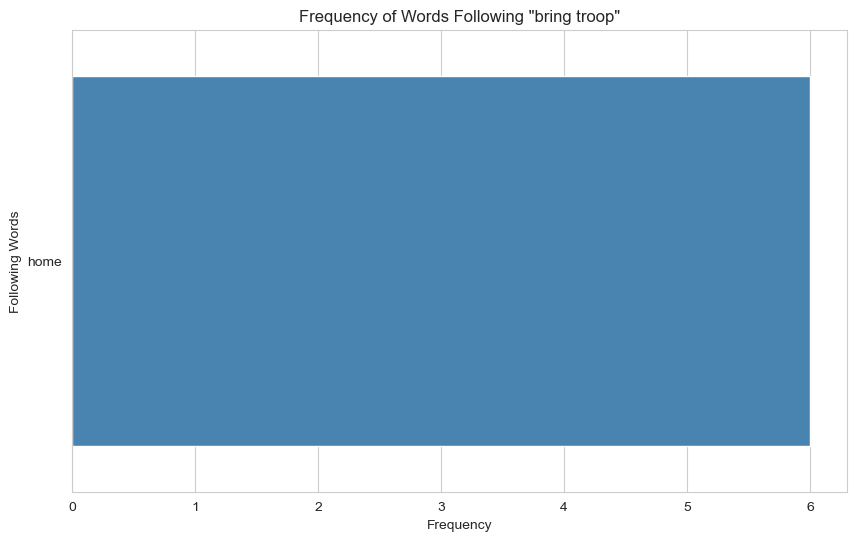

In [48]:
helper_functions.plot_ngram_frequencies(("bring", "troop"), trigram_cfd)

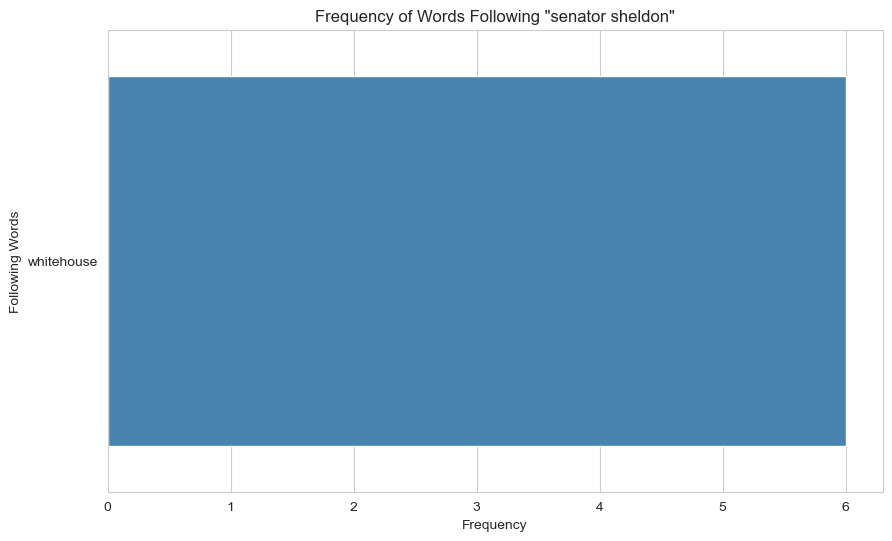

In [49]:
helper_functions.plot_ngram_frequencies(("senator", "sheldon"), trigram_cfd)

## <span style="color:#9addbd">**Exercise 5**</span>

<span style="color:#9addbd"> Perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.</span>

First, create enetity tags for the sentence:

In [50]:
abstract_corpus_df['classified_sents'] = abstract_corpus_df['Sentence'].apply(lambda x: helper_functions.tag_sents_ner(x))
abstract_corpus_df['classified_sents'].head()

0    [[(one two or three, CARDINAL), (CDA, ORG), (C...
1    [[(LTC, PERSON), (five, CARDINAL), (Cochrane C...
2    [[(Confirmation, ORG), (three, CARDINAL)], [(t...
3    [[(BED, ORG), (BED, ORG), (METHOD, ORG), (Febr...
4    [[(one, CARDINAL), (four, CARDINAL), (only one...
Name: classified_sents, dtype: object

Find out the different kinds of entities tagged:

In [51]:
abstract_corpus_entity_kind_counts = {}
for entry in abstract_corpus_df['classified_sents']:
    for sentence in entry:
        for _, kind in sentence:
            abstract_corpus_entity_kind_counts[kind] = abstract_corpus_entity_kind_counts.get(kind, 0) + 1

abstract_corpus_entity_kind_counts = sorted(abstract_corpus_entity_kind_counts.items(), key = lambda x: x[1], reverse = True)

len(abstract_corpus_entity_kind_counts)

18

In [52]:
abstract_corpus_entity_kind_counts

[('CARDINAL', 401),
 ('ORG', 339),
 ('DATE', 143),
 ('PERSON', 61),
 ('GPE', 34),
 ('NORP', 23),
 ('ORDINAL', 20),
 ('PRODUCT', 19),
 ('MONEY', 12),
 ('LOC', 9),
 ('TIME', 9),
 ('QUANTITY', 8),
 ('LANGUAGE', 6),
 ('PERCENT', 5),
 ('LAW', 4),
 ('EVENT', 4),
 ('WORK_OF_ART', 4),
 ('FAC', 3)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'CARDINAL'),
  Text(1, 0, 'ORG'),
  Text(2, 0, 'DATE'),
  Text(3, 0, 'PERSON'),
  Text(4, 0, 'GPE'),
  Text(5, 0, 'NORP'),
  Text(6, 0, 'ORDINAL'),
  Text(7, 0, 'PRODUCT'),
  Text(8, 0, 'MONEY'),
  Text(9, 0, 'LOC'),
  Text(10, 0, 'TIME'),
  Text(11, 0, 'QUANTITY'),
  Text(12, 0, 'LANGUAGE'),
  Text(13, 0, 'PERCENT'),
  Text(14, 0, 'LAW'),
  Text(15, 0, 'EVENT'),
  Text(16, 0, 'WORK_OF_ART'),
  Text(17, 0, 'FAC')])

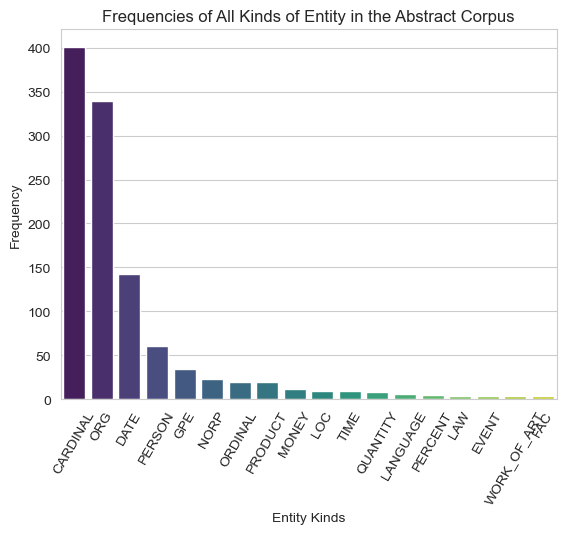

In [53]:
sns.barplot(x='Entity Kinds', y='Frequency', data=pd.DataFrame(abstract_corpus_entity_kind_counts, columns=['Entity Kinds', 'Frequency']), palette="viridis")
plt.title('Frequencies of All Kinds of Entity in the Abstract Corpus')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CARDINAL'),
  Text(1, 0, 'ORG'),
  Text(2, 0, 'DATE'),
  Text(3, 0, 'PERSON'),
  Text(4, 0, 'GPE'),
  Text(5, 0, 'NORP'),
  Text(6, 0, 'ORDINAL'),
  Text(7, 0, 'PRODUCT'),
  Text(8, 0, 'MONEY'),
  Text(9, 0, 'LOC')])

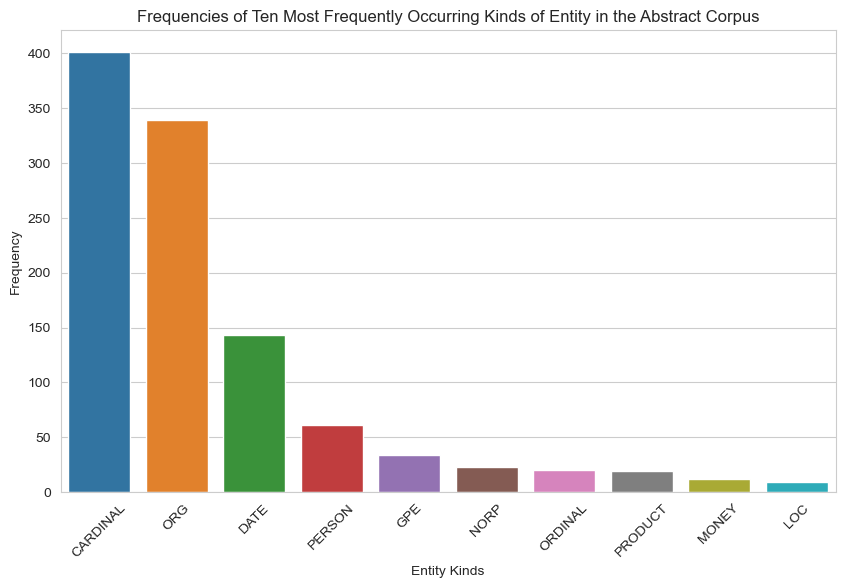

In [54]:
kinds, counts = zip(*abstract_corpus_entity_kind_counts[:10])
df = pd.DataFrame({
    'Entity Kinds': kinds,
    'Frequency': counts
})

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Entity Kinds', y='Frequency', data=df)
plt.title('Frequencies of Ten Most Frequently Occurring Kinds of Entity in the Abstract Corpus')
plt.xlabel('Entity Kinds')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

For Exercise 5, I choose to tally "ORG" entity named and calculate the Precision, Recall and F-score for the NER classification just performed on a subset of corpus

In [55]:
# Create a set of unique set of 
org_entity_ner = set()

# Set random seed
seed = 2333

for s in abstract_corpus_df['classified_sents'].sample(50, random_state=seed).sum():
    for entity, kind in s:
        if kind == "ORG":
            org_entity_ner.add(entity)

print("There are in total {} unique ORG labels from a sample of 50 sentences.".format(len(org_entity_ner)))

There are in total 120 unique ORG labels from a sample of 50 sentences.


In [56]:
print(org_entity_ner)

{'FDA', 'WhatsApp Groups', 'Meta Analyses', 'Childhood', 'Thematic Analysis', 'Comparing', 'CCMDCTR', 'Groups', 'Norris', 'WhatsApp', 'the Australian Government Targeting', 'VSTM', 'Eleven', 'Electrophysiological', 'PsycInfo Database Record', 'Recognition', 'UC', 'IVF', 'Hedges', 'AnthroSource Reference', 'Purpose Objective Research Question Focus of Study Deploying', 'ASD', 'IBM', 'ANS', 'RESULTS Overall', 'National Health Service Direct', 'Hand', 'Publications', 'the European Convention on Human Rights', 'PubMed CINAHL PsychINFO', 'CST Findings', 'AMSTAR', 'Preferred Reporting Items for Systematic Reviews', "the Cochrane Common Mental Disorders Group 's", 'AIM', 'the Joanna Briggs Institute JBI Critical', 'Background Persons', 'Confidentiality', 'ACM', 'Confirmation', 'CONCLUSIONS Data', 'Conclusion Anxiety', 'COVID-19 infection Panic', 'Limited', 'the Cochrane Central Register of Controlled Trials', 'Telemedicine', 'APA', 'Medline Embase', 'CBT', 'CTM', 'PRISMA', 'CI', 'Google Schol

Manually code whether the tags are indeed ORG

In [57]:
org_entity_manual = {
    "WhatsApp", "The Cochrane Library Reference", "the Cochrane Common Mental Disorders Group", 
    "IBM", "MEDLINE", "APA", "AMSTAR", "the Joanna Briggs Institute JBI Critical",
    "METHODS Pubmed Scopus Science Direct", "Preferred Reporting Items for Systematic Reviews",
    "Method Medline PsycInfo SciSearch SocScisearch", "BNI", "CCMDCTR", "FDA", "the European Court of Human Rights ECtHR",
    "Google Scholar", "National Health Service Direct", "PsycInfo Database Record", "The Cochrane Risk of Bias",
    "AnthroSource Reference", "the Cochrane Central Register of Controlled Trials", "ACM", 
    "MedLine Scopus Cochrane", "the European Convention on Human Rights", "Cochrane", "PubMed Medline",
    "PubMed CINAHL PsychINFO", "PRISMA", "MedLine Psycinfo CINAHL", "PubMed", "the Centre for Reviews and Dissemination",
    "the National Library of Medicine 's PubMed Database"
}

Calculate the Precision, Recall and F-score

In [58]:
# Calculate true_positive, false_positive, and false_positive
true_positive = len(org_entity_ner & org_entity_manual)
false_positive = len(org_entity_ner - org_entity_manual)
false_negative = len(org_entity_manual - org_entity_ner)

precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
f_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

org_classification_performance = pd.DataFrame({"ORG Precision": precision,
                                               "ORG Recall": recall,
                                               "ORG F-score": f_score},index=["ORG Classification Performance"])
org_classification_performance

,ORG Precision,ORG Recall,ORG F-score
ORG Classification Performance,0.258333,0.96875,0.407895


## <span style="color:#9addbd">**Exercise 6**</span>

<span style="color:#9addbd">Parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?</span>

First, parse the corpus:

In [59]:
abstract_corpus_df.head()

,Title,Author,Abstract,Cleaned_Abstract,Abstract_Token,Sentence,POS_Sentence,classified_sents
0,The Control of Single-color and Multiple-color...,"A. Grubert, N. Carlisle, M. Eimer",The question whether target selection in visua...,The question whether target selection in visua...,"[The, question, whether, target, selection, in...","[[The, question, whether, target, selection, i...","[[(The, DT), (question, NN), (whether, IN), (t...","[[(one two or three, CARDINAL), (CDA, ORG), (C..."
1,Non-pharmacologic and pharmacologic treatments...,"K. Atchison, J. Watt, Delaney Ewert, A. Toohey...",BACKGROUND\nolder adults living in long-term c...,BACKGROUND\nolder adults living in long-term c...,"[BACKGROUND, older, adults, living, in, long, ...","[[BACKGROUND, older, adults, living, in, long,...","[[(BACKGROUND, NN), (older, JJR), (adults, NNS...","[[(LTC, PERSON), (five, CARDINAL), (Cochrane C..."
2,"Confirmation bias in information search, inter...","Dáša Vedejová, V. Čavojová",Abstract Confirmation bias is often used as an...,Abstract Confirmation bias is often used as an...,"[Abstract, Confirmation, bias, is, often, used...","[[Abstract, Confirmation, bias, is, often, use...","[[(Abstract, NNP), (Confirmation, NNP), (bias,...","[[(Confirmation, ORG), (three, CARDINAL)], [(t..."
3,Meta-analysis on the long-term effectiveness o...,"A. Hilbert, D. Petroff, S. Herpertz, R. Pietro...",OBJECTIVE\nLong-term effectiveness is a critic...,OBJECTIVE\nLong-term effectiveness is a critic...,"[OBJECTIVE, Long, term, effectiveness, is, a, ...","[[OBJECTIVE, Long, term, effectiveness, is, a,...","[[(OBJECTIVE, NNP), (Long, JJ), (term, NN), (e...","[[(BED, ORG), (BED, ORG), (METHOD, ORG), (Febr..."
4,On the search for a selective and retroactive ...,"F. Kalbe, L. Schwabe",Storing motivationally salient experiences pre...,Storing motivationally salient experiences pre...,"[Storing, motivationally, salient, experiences...","[[Storing, motivationally, salient, experience...","[[(Storing, VBG), (motivationally, RB), (salie...","[[(one, CARDINAL), (four, CARDINAL), (only one..."


In [60]:
sentence_list = [" ".join(i) for i in  abstract_corpus_df["Sentence"].sum()]

parsed_corpus = [nlp(sentence) for sentence in sentence_list]

parsed_corpus[:10]

[The question whether target selection in visual search can be effectively controlled by simultaneous attentional templates for multiple features is still under dispute,
 We investigated whether multiple color attentional guidance is possible when target colors remain constant and can thus be represented in long term memory but not when they change frequently and have to be held in working memory,
 Participants searched for one two or three possible target colors that were specified by cue displays at the start of each trial,
 In constant color blocks the same colors remained task relevant throughout,
 In variable color blocks target colors changed between trials,
 The contralateral delay activity CDA to cue displays increased in amplitude as a function of color memory load in variable color blocks which indicates that cued target colors were held in working memory,
 In constant color blocks the CDA was much smaller suggesting that color representations were primarily stored in long te

- Deph of the phrase structure and dependency parse trees nested:

In [61]:
sentence_depth_df = {"Sentence": [], "Depth": []}

for sentence in parsed_corpus:
    if len(sentence) > 0: 
        root = [token for token in sentence if token.head == token][0]
        sentence_depth_df["Sentence"].append(sentence.text)
        sentence_depth_df["Depth"].append(helper_functions.max_depth(root))

sentence_depth_df = pd.DataFrame(sentence_depth_df)

sentence_depth_df["Depth"].describe()

count    959.000000
mean       7.312826
std        3.042523
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       30.000000
Name: Depth, dtype: float64

- Relation between parse depth and perceived sentence complexity: In a nutshell, the deeper the more complex of a sentence

In [62]:
min_depth = sentence_depth_df["Depth"].min()
mean_depth = round(sentence_depth_df["Depth"].mean())
max_depth = sentence_depth_df["Depth"].max()

In [63]:
# Randomly select one sentence with minimum depth
sample_sentence_min_depth = nlp(sentence_depth_df[sentence_depth_df["Depth"] == min_depth]["Sentence"].sample(1, random_state=seed).to_list()[0])
spacy.displacy.render(sample_sentence_min_depth, style='dep')

In [64]:
# Randomly select one sentence with rounded value of mean depth
sample_sentence_mean_depth = nlp(sentence_depth_df[sentence_depth_df["Depth"] == mean_depth]["Sentence"].sample(1, random_state=seed).to_list()[0])
spacy.displacy.render(sample_sentence_mean_depth, style='dep')

In [65]:
sample_sentence_max_depth = nlp(str(sentence_depth_df[sentence_depth_df["Depth"] == max_depth]["Sentence"].sample(1, random_state=seed).to_list()[0]))
spacy.displacy.render(sample_sentence_max_depth, style='dep')

- Extract five linguisitic features from parses and apply them to a focal set of words

In [66]:
focal_words = {"memory", "disorder"}

In [67]:
linguistic_features = {word: {'noun_phrases': [], 'adjectives': [], 'verbs': [], 'dependencies': [], 'co_occurring': []} for word in focal_words}

for doc in parsed_corpus:
    # Feature 1: noun phrases containing the focal words
    for np in doc.noun_chunks:
        np_words = set(np.text.lower().split())
        common_words = focal_words.intersection(np_words)
        for word in common_words:
            linguistic_features[word]['noun_phrases'].append(np.text)
    
    for token in doc:
        # Feature 2: adjectives modifying the focal words 
        if token.pos_ == "ADJ" and token.head.text.lower() in focal_words:
            linguistic_features[token.head.text.lower()]['adjectives'].append(token.text)

        # Feature 3: verbs associated with the focal Words (either subjects or objects)
        if token.head.text.lower() in focal_words and token.pos_ == "VERB":
            linguistic_features[token.head.text.lower()]['verbs'].append(token.text)
        if token.text.lower() in focal_words and token.head.pos_ == "VERB":
            linguistic_features[token.text.lower()]['verbs'].append(token.head.text)

        # Feature 4: dependency relations where the focal words are involved
        if token.text.lower() in focal_words:
            linguistic_features[token.text.lower()]['dependencies'].append((token.text, token.dep_, token.head.text))

    # Feature 5: named entities that frequently co-occur with the focal words in the same sentences
    for ent in doc.ents:
        sentence_words = set(token.text.lower() for token in ent.sent)
        if focal_words.intersection(sentence_words):
            for focal_word in focal_words.intersection(sentence_words):
                linguistic_features[focal_word]['co_occurring'].append(ent.text)

linguistic_features_df = pd.DataFrame(linguistic_features)

In [68]:
linguistic_features_df

,memory,disorder
noun_phrases,"[long term memory, working memory, color memor...","[disorder BED, disorder, simple phobia obsessi..."
adjectives,"[enhanced, high, weak, visual, visual, visual,...","[obsessive, compulsive, traumatic, specific, c..."
verbs,"[working, working, working, showed, working, e...","[eating, excluding, impairs, generalized, obse..."
dependencies,"[(memory, pobj, in), (memory, pobj, in), (memo...","[(disorder, compound, BED), (disorder, dobj, e..."
co_occurring,"[CDA, CDA, three, four, only one, four, Bayesi...","[BED, RESULTS Effectiveness, up to 12 months, ..."


Visualization of the results

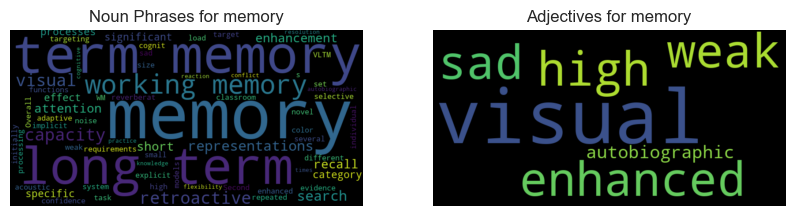

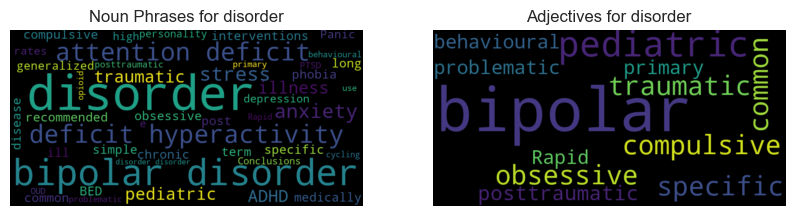

In [69]:
from wordcloud import WordCloud

for word, feats in linguistic_features.items():
    noun_phrases = ' '.join(feats['noun_phrases'])
    adjectives = ' '.join(feats['adjectives'])
    
    # Create word clouds
    np_cloud = WordCloud(width=800, height=400).generate(noun_phrases)
    adj_cloud = WordCloud(width=800, height=400).generate(adjectives)
    
    # Display word clouds
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(np_cloud, interpolation='bilinear')
    plt.title(f"Noun Phrases for {word}")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(adj_cloud, interpolation='bilinear')
    plt.title(f"Adjectives for {word}")
    plt.axis('off')

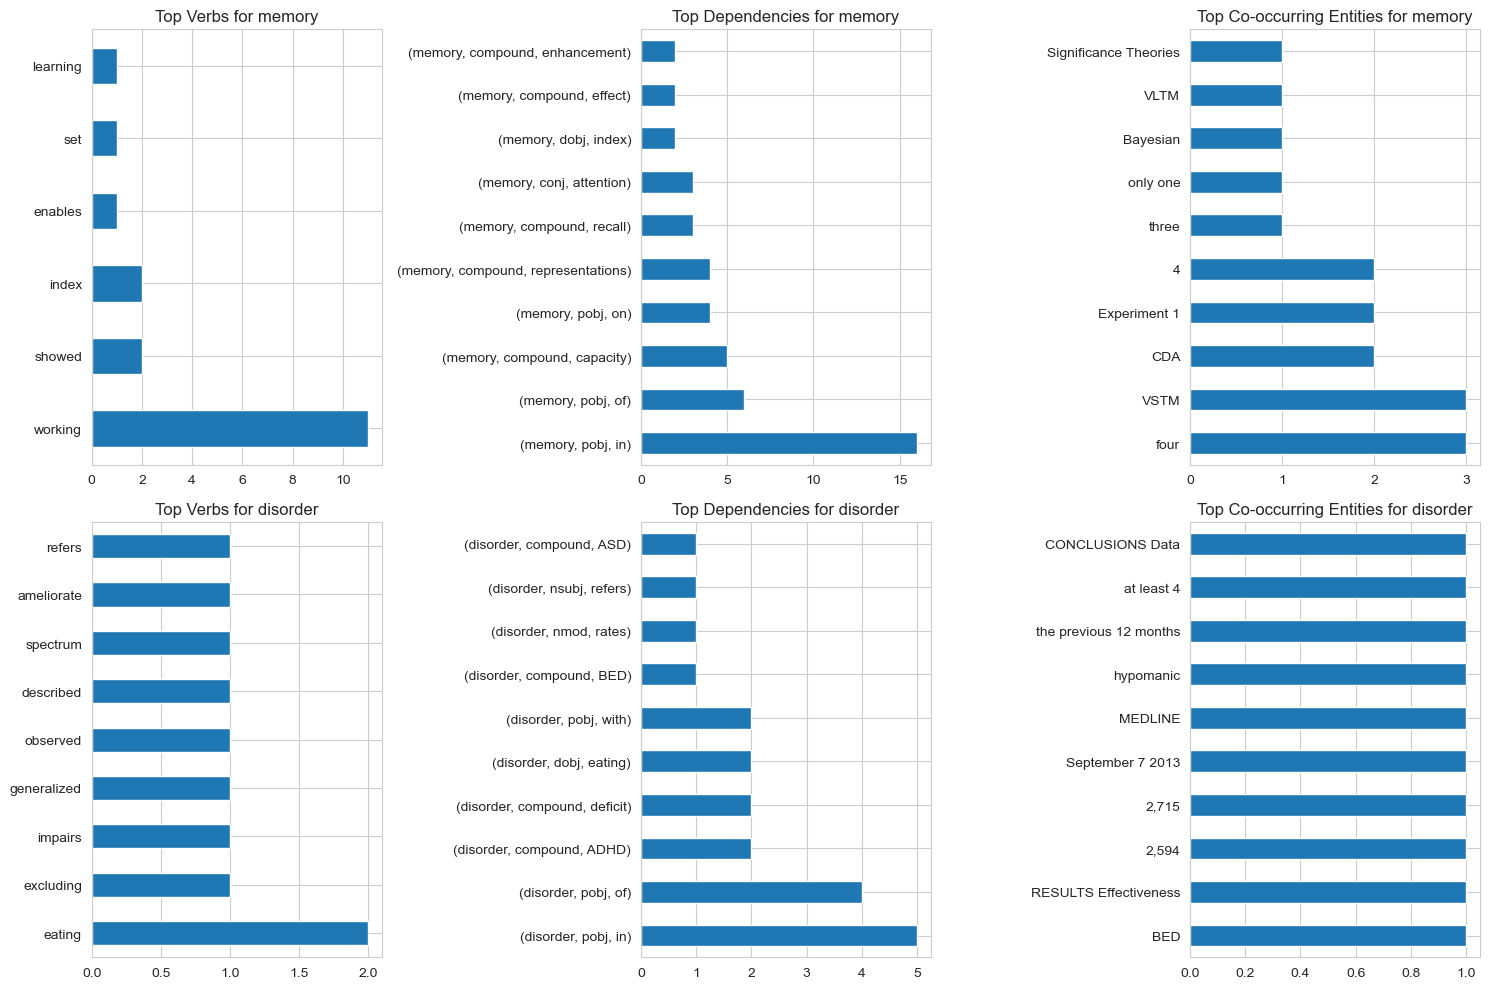

In [70]:
fig, axs = plt.subplots(len(focal_words), 3, figsize=(15, 5 * len(focal_words)))

for i, word in enumerate(focal_words):
    helper_functions.plot_bar_chart(linguistic_features[word]['verbs'], f"Top Verbs for {word}", axs[i, 0])
    helper_functions.plot_bar_chart(linguistic_features[word]['dependencies'], f"Top Dependencies for {word}", axs[i, 1])
    helper_functions.plot_bar_chart(linguistic_features[word]['co_occurring'], f"Top Co-occurring Entities for {word}", axs[i, 2])

plt.tight_layout()

## <span style="color:#9addbd">**Exercise 7**</span>

<span style="color:#9addbd">Calculate the KL and χ² divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better?</span>

For Exercise 7, I scraped abstracts from four fields of study to create four separate corpora.

In [71]:
fieldsOfStudy = ["Engineering", "Physics", "Philosophy", "History"]

abstract_corpus_collection = {f: helper_functions.scrape_abstract(f) for f in fieldsOfStudy}

In [72]:
abstract_corpus_collection["Engineering"].head()

,FieldOfStudy,Title,Author,Abstract,tokenized_text,normalized_tokens,stopwords,non_stopwords
0,Engineering,Engineering Psychology and Human Performance,"C. Wickens, J. G. Hollands, S. Banbury, R. Par...",1. Introduction to Engineering Psychology and ...,"[1, Introduction, to, Engineering, Psychology,...","[introduction, engineering, psychology, human,...",[make],"[introduction, engineering, psychology, human,..."
1,Engineering,Active learning increases student performance ...,"S. Freeman, Sarah L. Eddy, Miles McDonough, Mi...",Significance The President’s Council of Adviso...,"[Significance, The, President, ’s, Council, of...","[significance, president, council, advisor, sc...","[call, call]","[significance, president, council, advisor, sc..."
2,Engineering,Multiplex Genome Engineering Using CRISPR/Cas ...,"Le Cong, F. Ran, David B. T. Cox, Shuailiang L...",Genome Editing Clustered regularly interspaced...,"[Genome, Editing, Clustered, regularly, inters...","[genome, editing, cluster, regularly, interspa...",[show],"[genome, editing, cluster, regularly, interspa..."
3,Engineering,The new frontier of genome engineering with CR...,"J. Doudna, E. Charpentier",Background Technologies for making and manipul...,"[Background, Technologies, for, making, and, m...","[background, technology, make, manipulate, dna...","[make, have]","[background, technology, manipulate, dna, enab..."
4,Engineering,RNA-Guided Human Genome Engineering via Cas9,"P. Mali, Luhan Yang, K. Esvelt, J. Aach, M. Gu...",Genome Editing Clustered regularly interspaced...,"[Genome, Editing, Clustered, regularly, inters...","[genome, editing, cluster, regularly, interspa...",[],"[genome, editing, cluster, regularly, interspa..."


In [73]:
abstract_corpus_collection["Physics"].head()

,FieldOfStudy,Title,Author,Abstract,tokenized_text,normalized_tokens,stopwords,non_stopwords
0,Physics,Plasma Physics via Computer Simulation,"C. Birdsall, A. Langdon",PART 1: PRIMER Why attempting to do plasma phy...,"[PART, 1, PRIMER, Why, attempting, to, do, pla...","[primer, attempt, plasma, physics, computer, s...",[make],"[primer, attempt, plasma, physics, computer, s..."
1,Physics,CRC Handbook of Chemistry and Physics,W. M. Haynes,"CRC handbook of chemistry and physics , CRC ha...","[CRC, handbook, of, chemistry, and, physics, C...","[crc, handbook, chemistry, physics, crc, handb...",[],"[crc, handbook, chemistry, physics, crc, handb..."
2,Physics,Introduction to solid state physics,C. Kittel,Mathematical Introduction Acoustic Phonons Pla...,"[Mathematical, Introduction, Acoustic, Phonons...","[mathematical, introduction, acoustic, phonon,...",[],"[mathematical, introduction, acoustic, phonon,..."
3,Physics,Plasma Physics,Richard Fitzpatrick,Several approaches are commonly used to study ...,"[Several, approaches, are, commonly, used, to,...","[approach, commonly, study, system, o, f, char...","[call, give]","[approach, commonly, study, system, o, f, char..."
4,Physics,Atmospheric Chemistry and Physics: From Air Po...,"J. Seinfeld, S. Pandis, K. Noone",Expanded and updated with new findings and new...,"[Expanded, and, updated, with, new, findings, ...","[expand, update, new, finding, new, feature, n...",[],"[expand, update, new, finding, new, feature, n..."


In [74]:
abstract_corpus_collection["Philosophy"].head()

,FieldOfStudy,Title,Author,Abstract,tokenized_text,normalized_tokens,stopwords,non_stopwords
0,Philosophy,Space-Perception and the Philosophy of Science,"P. Heelan, James L. Park",Drawing on the phenomenological tradition in t...,"[Drawing, on, the, phenomenological, tradition...","[draw, phenomenological, tradition, philosophy...",[],"[draw, phenomenological, tradition, philosophy..."
1,Philosophy,Towards a Transformation of Philosophy,"K. Apel, G. Adey, D. Frisby","As Apel himself notes in his preface, the expr...","[As, Apel, himself, notes, in, his, preface, t...","[apel, note, preface, expression, transformati...","[name, take]","[apel, note, preface, expression, transformati..."
2,Philosophy,Speech Acts: An Essay in the Philosophy of Lan...,J. Searle,Part I. A Theory of Speech Acts: 1. Methods an...,"[Part, I., A, Theory, of, Speech, Acts, 1, Met...","[i., theory, speech, act, method, scope, expre...",[],"[i., theory, speech, act, method, scope, expre..."
3,Philosophy,Philosophy in the flesh : the embodied mind an...,"G. Lakoff, Mark L. Johnson",* Introduction: Who Are We? How The Embodied M...,"[Introduction, Who, Are, We, How, The, Embodie...","[introduction, embody, mind, challenge, wester...",[],"[introduction, embody, mind, challenge, wester..."
4,Philosophy,The Philosophy of Philosophy,T. Williamson,Preface. Acknowledgments. Introduction. 1. The...,"[Preface, Acknowledgments, Introduction, 1, Th...","[preface, acknowledgment, introduction, lingui...","[take, well]","[preface, acknowledgment, introduction, lingui..."


In [75]:
abstract_corpus_collection["History"].head()

,FieldOfStudy,Title,Author,Abstract,tokenized_text,normalized_tokens,stopwords,non_stopwords
0,History,Capital in the twenty-first century: a multidi...,T. Piketty,I am most grateful to the editors of the Briti...,"[I, am, most, grateful, to, the, editors, of, ...","[grateful, editor, british, journal, sociology...","[put, well]","[grateful, editor, british, journal, sociology..."
1,History,A short history of SHELX.,G. Sheldrick,An account is given of the development of the ...,"[An, account, is, given, of, the, development,...","[account, give, development, shelx, system, co...",[give],"[account, development, shelx, system, computer..."
2,History,The MovieLens Datasets: History and Context,"F. M. Harper, J. Konstan, J. A.",The MovieLens datasets are widely used in educ...,"[The, MovieLens, datasets, are, widely, used, ...","[movielen, dataset, widely, education, researc...",[hundred],"[movielen, dataset, widely, education, researc..."
3,History,History on Film/Film on History,Robert A. Rosenstone,Chapter 1: History on film. Chapter 2: To see ...,"[Chapter, 1, History, on, film, Chapter, 2, To...","[chapter, history, film, chapter, past, chapte...",[],"[chapter, history, film, chapter, past, chapte..."
4,History,A Brief History of Neoliberalism,D. Harvey,Neoliberalism - the doctrine that market excha...,"[Neoliberalism, the, doctrine, that, market, e...","[neoliberalism, doctrine, market, exchange, et...",[show],"[neoliberalism, doctrine, market, exchange, et..."


In [76]:
# Concatenate the lists (of normalized tokens, stopwords and nonstop words) 
# into one big list for each field of study and then combine each field of study
abstract_corpus_concatenated = pd.DataFrame()

# Define the indices for the type of corpora tokens in the dataframe
df_index = ['normalized_tokens', 'stopwords', 'non_stopwords']

for f in fieldsOfStudy:
    f_df = pd.DataFrame(abstract_corpus_collection[f][df_index].sum()).T
    f_df.insert(0, 'Fields_of_study', f)
    abstract_corpus_concatenated = pd.concat([abstract_corpus_concatenated, f_df])

abstract_corpus_concatenated.reset_index(drop=True, inplace=True)

In [77]:
abstract_corpus_concatenated

,Fields_of_study,normalized_tokens,stopwords,non_stopwords
0,Engineering,"[introduction, engineering, psychology, human,...","[make, call, call, show, make, have, make, mak...","[introduction, engineering, psychology, human,..."
1,Physics,"[primer, attempt, plasma, physics, computer, s...","[make, call, give, one, part, see, one, take, ...","[primer, attempt, plasma, physics, computer, s..."
2,Philosophy,"[draw, phenomenological, tradition, philosophy...","[name, take, take, well, call, keep, name, go,...","[draw, phenomenological, tradition, philosophy..."
3,History,"[grateful, editor, british, journal, sociology...","[put, well, give, hundred, show, name, being, ...","[grateful, editor, british, journal, sociology..."


Then, I calculated the KL and χ² divergences, and the KS and Wasserstein distances between four separate corpora and plot these with heatmaps

- KL divergence and multidimensional scaling:

/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To sup

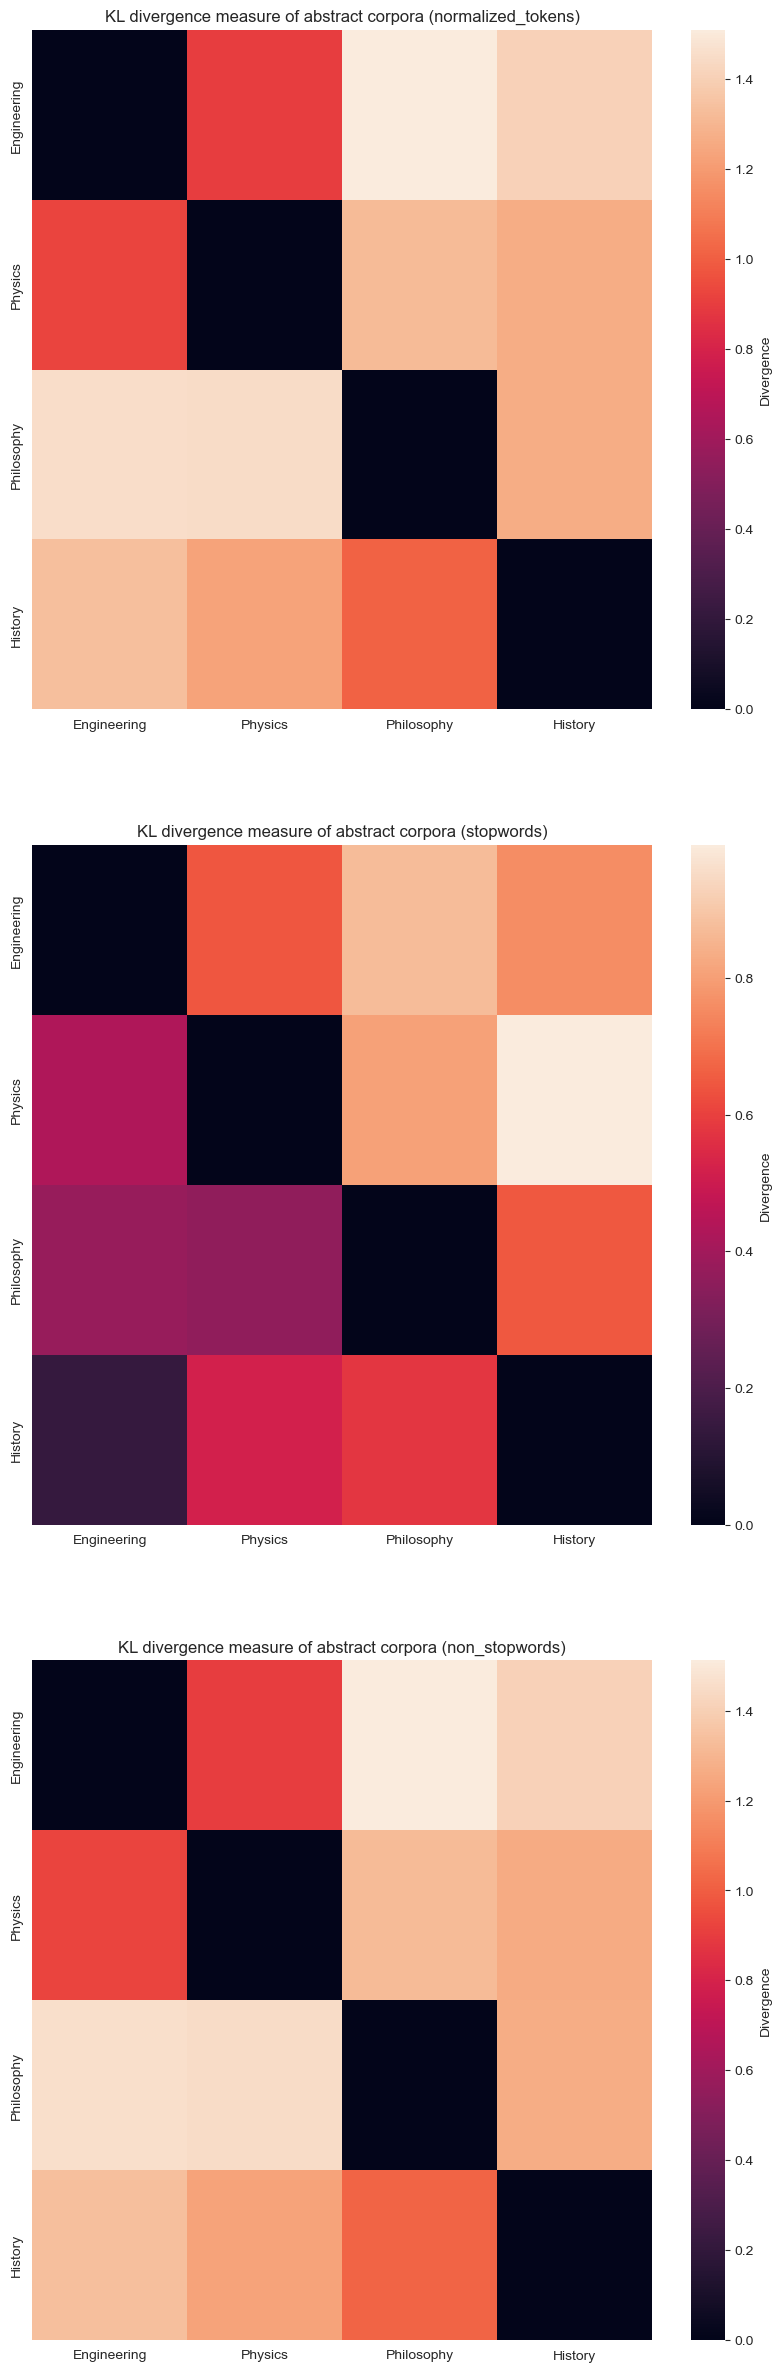

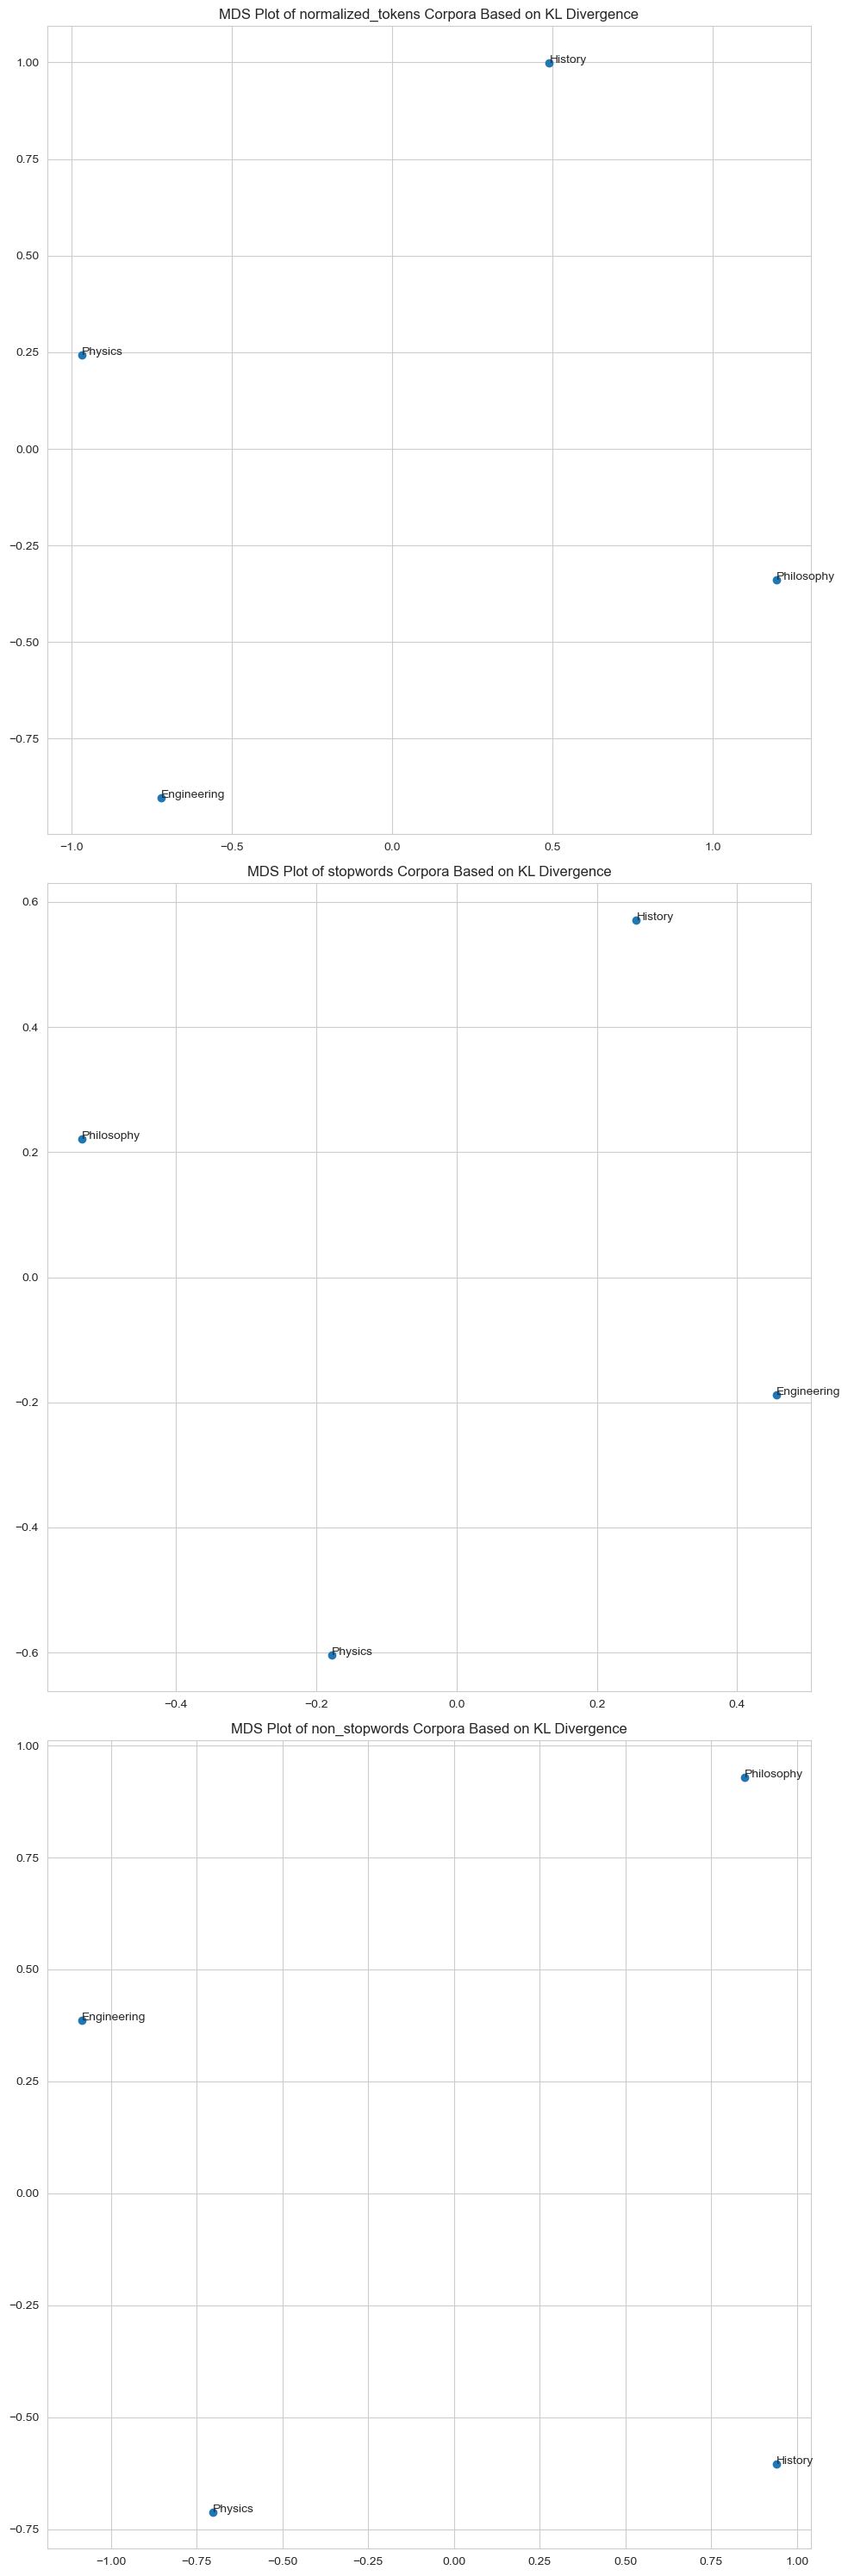

In [78]:
helper_functions.distributional_distance(abstract_corpus_concatenated, "KL", fieldsOfStudy, df_index)

- χ² divergences and multidimensional scaling:

/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To sup

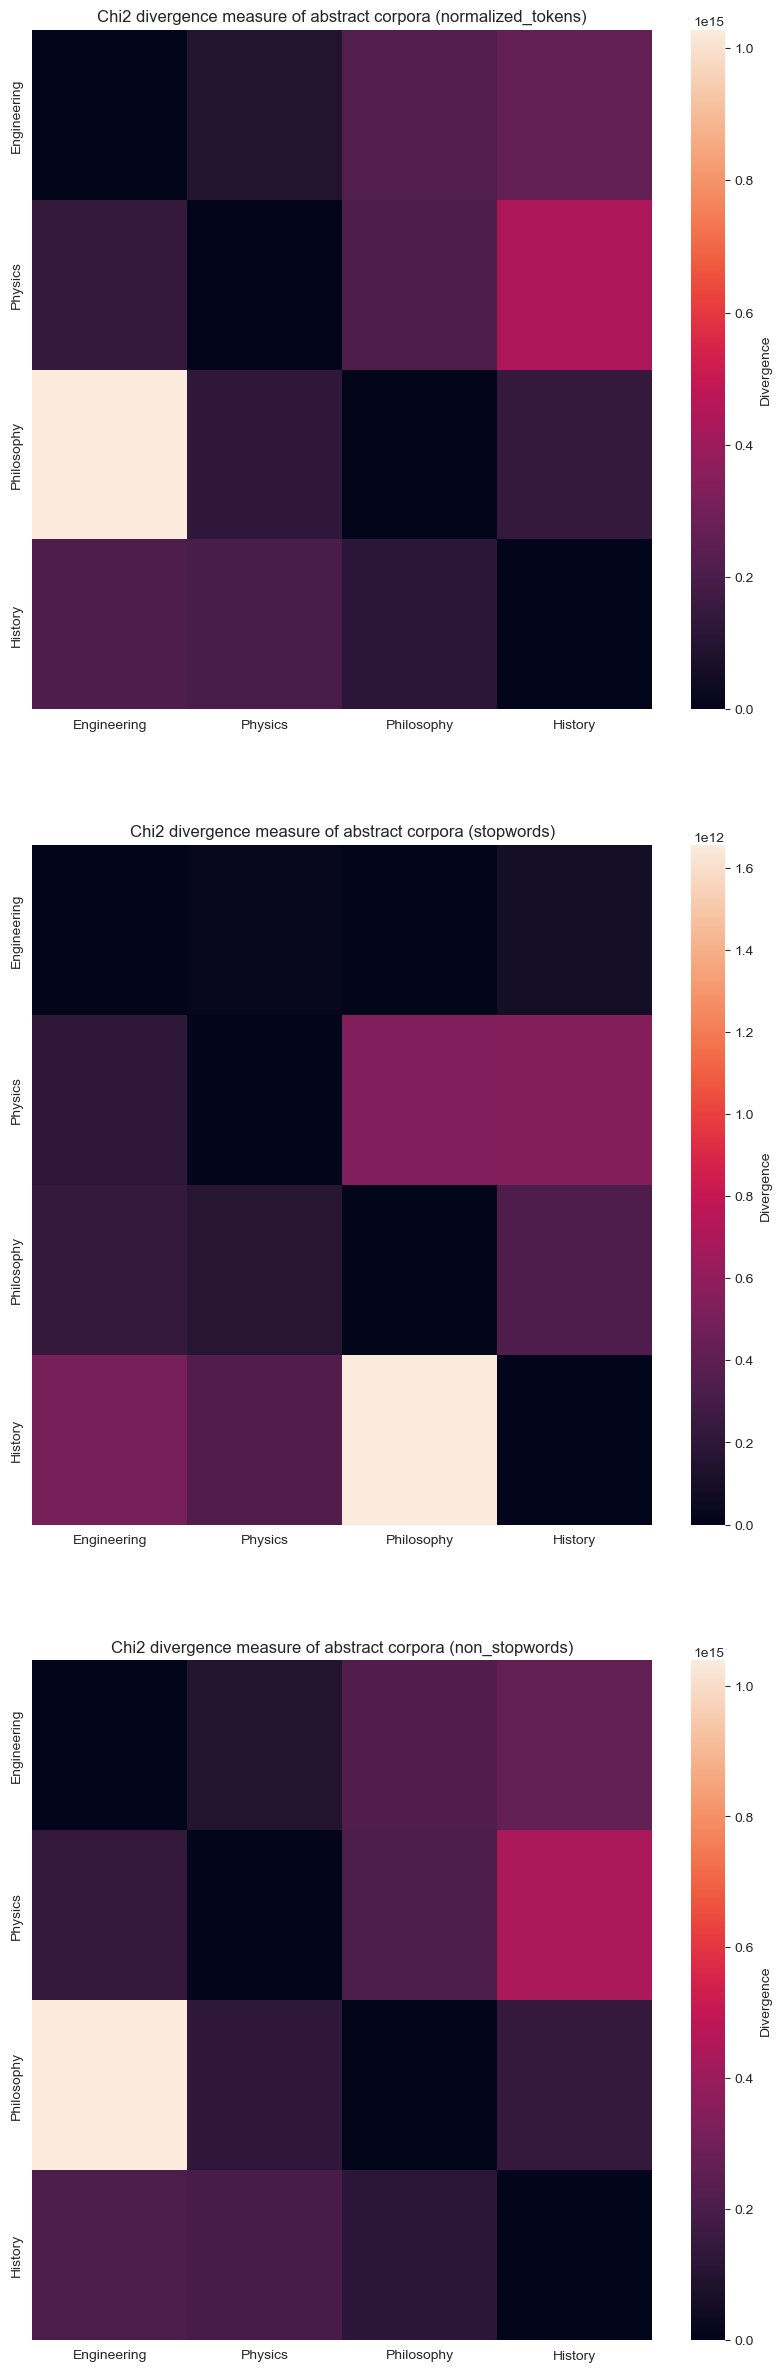

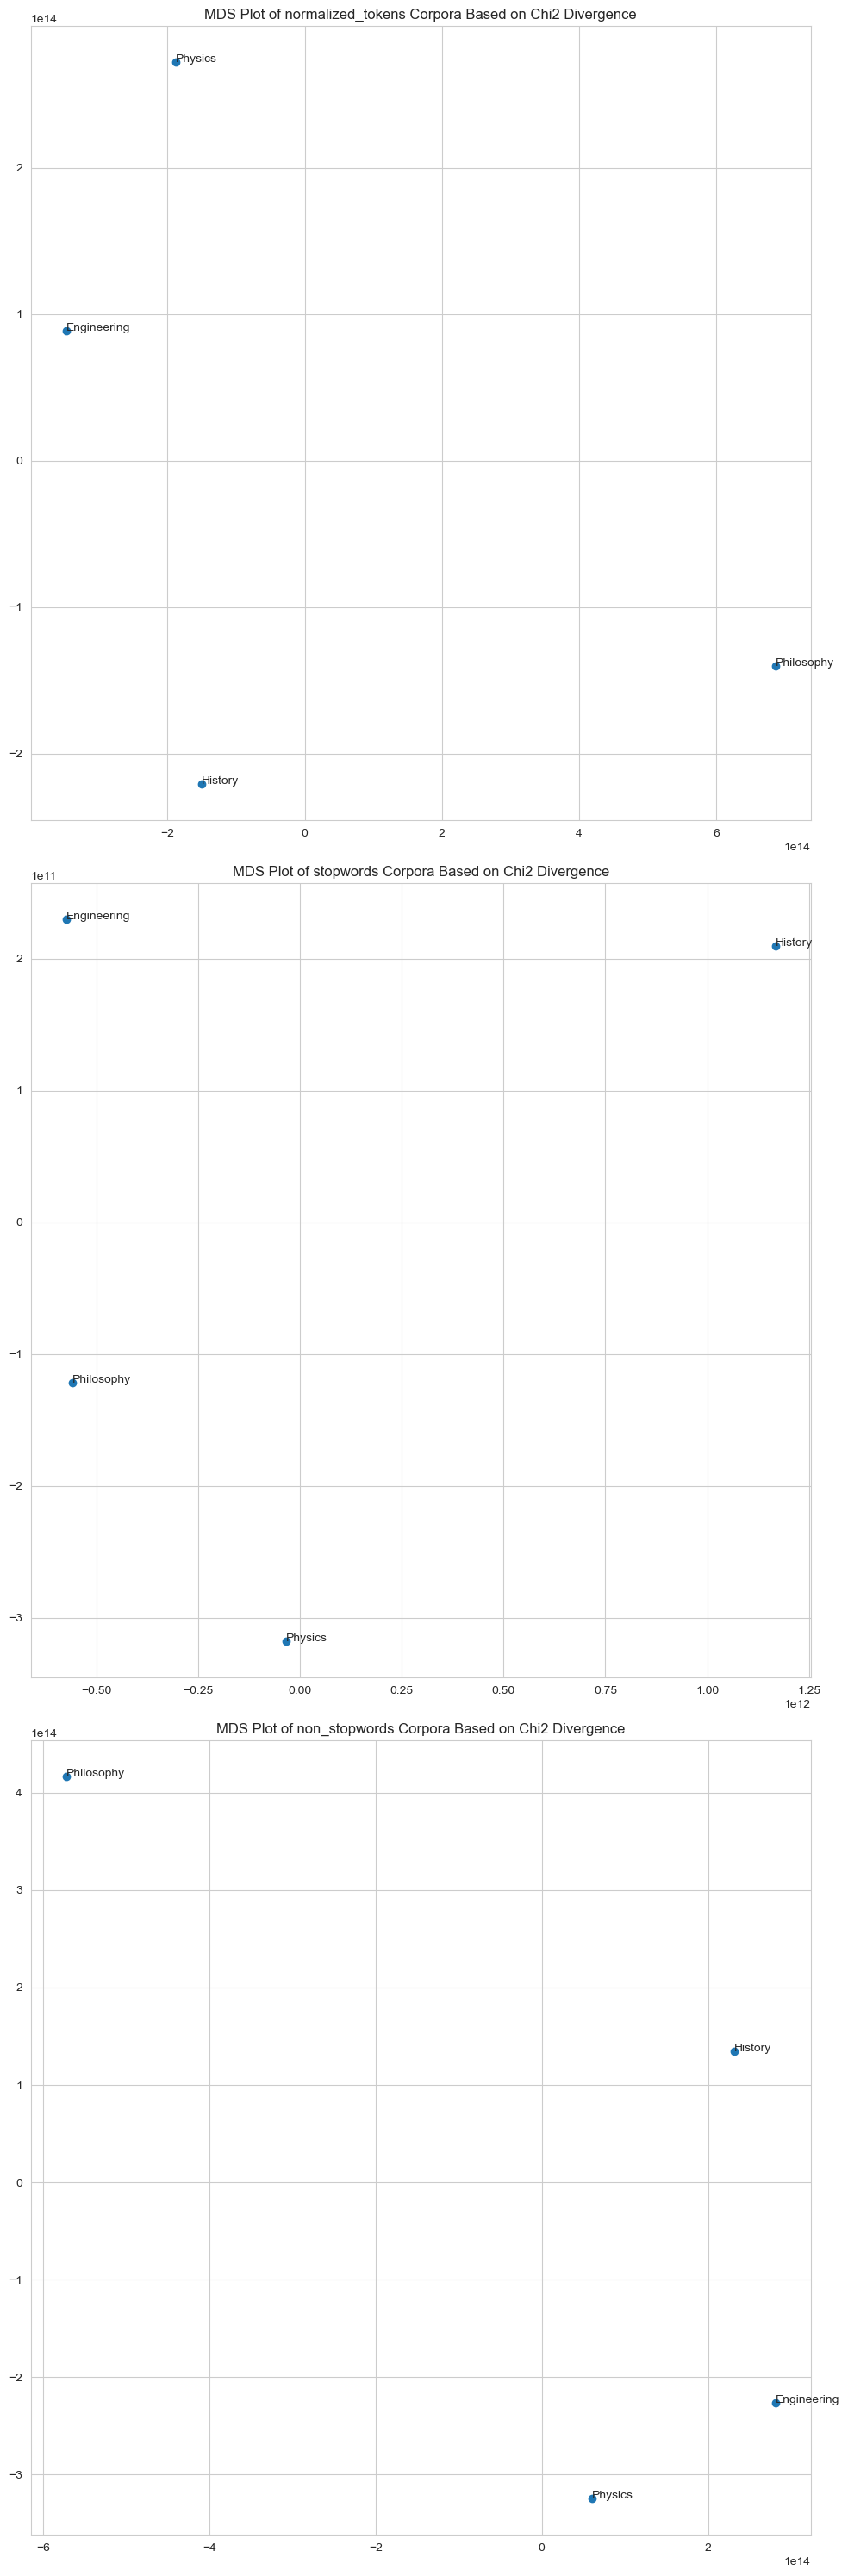

In [79]:
helper_functions.distributional_distance(abstract_corpus_concatenated, "Chi2", fieldsOfStudy, df_index) 

- KS distances multidimensional scaling:

/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To sup

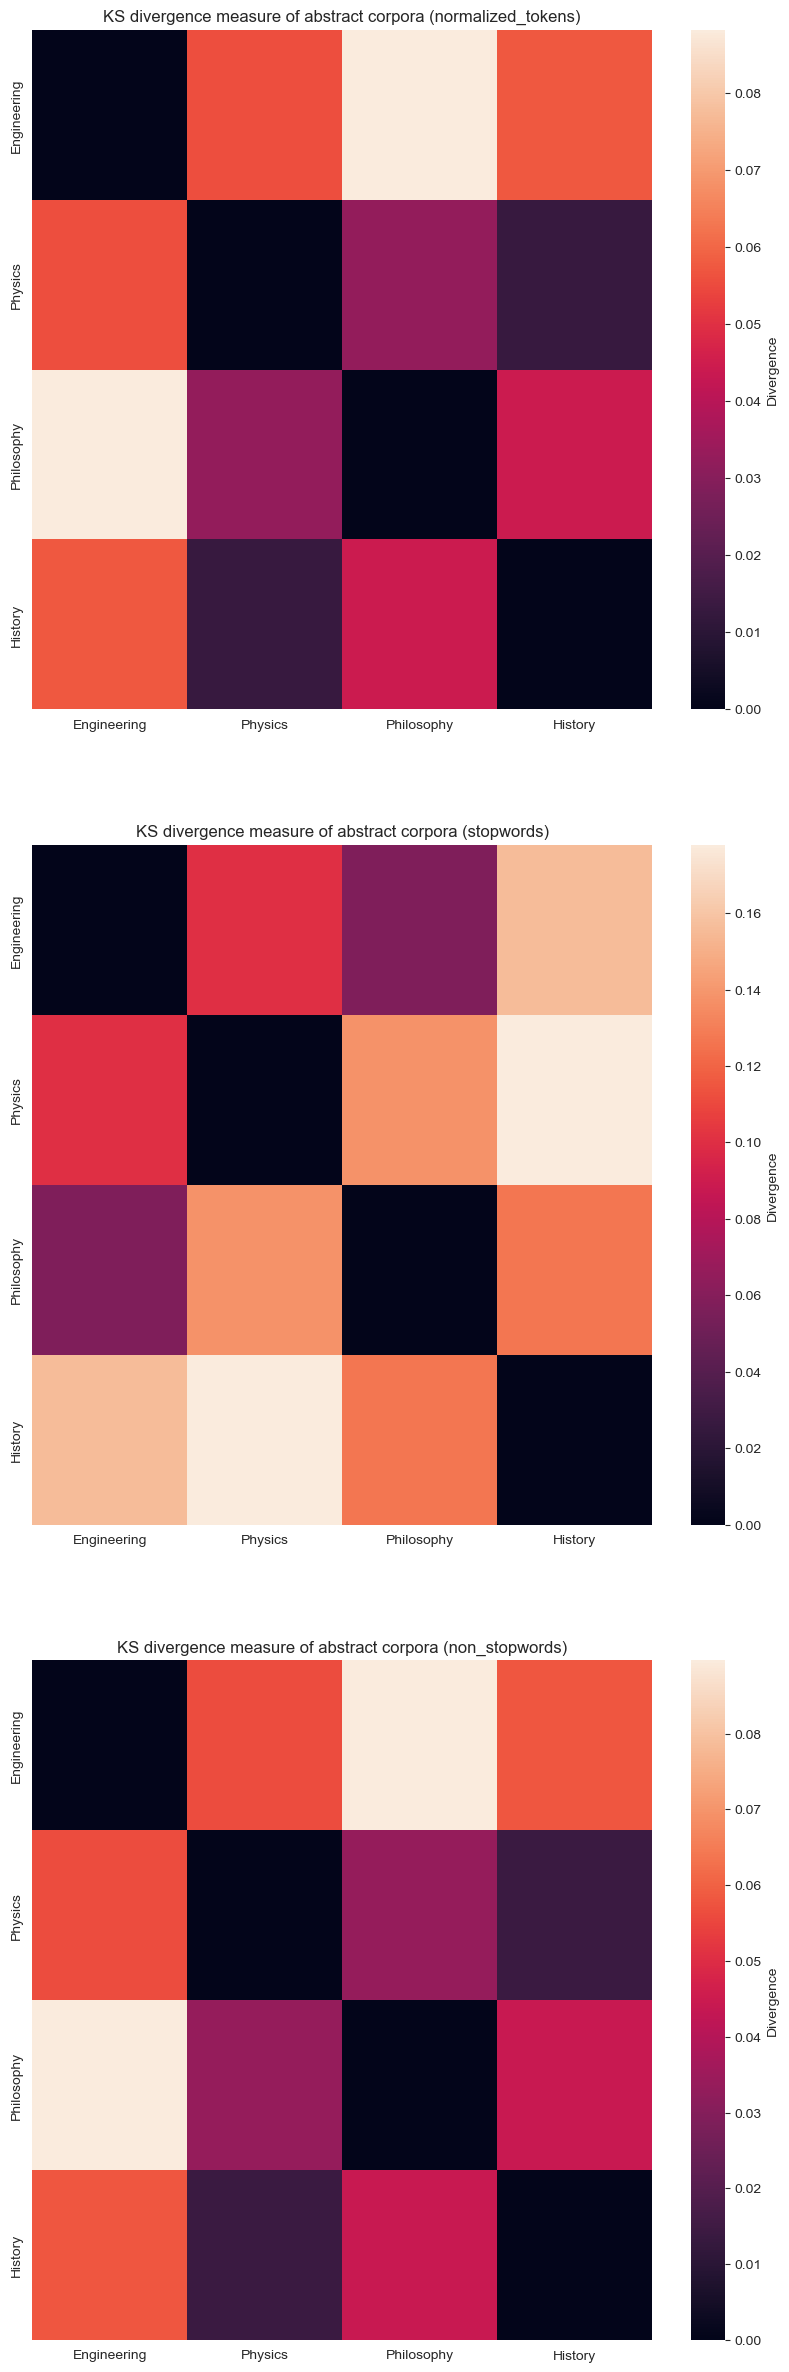

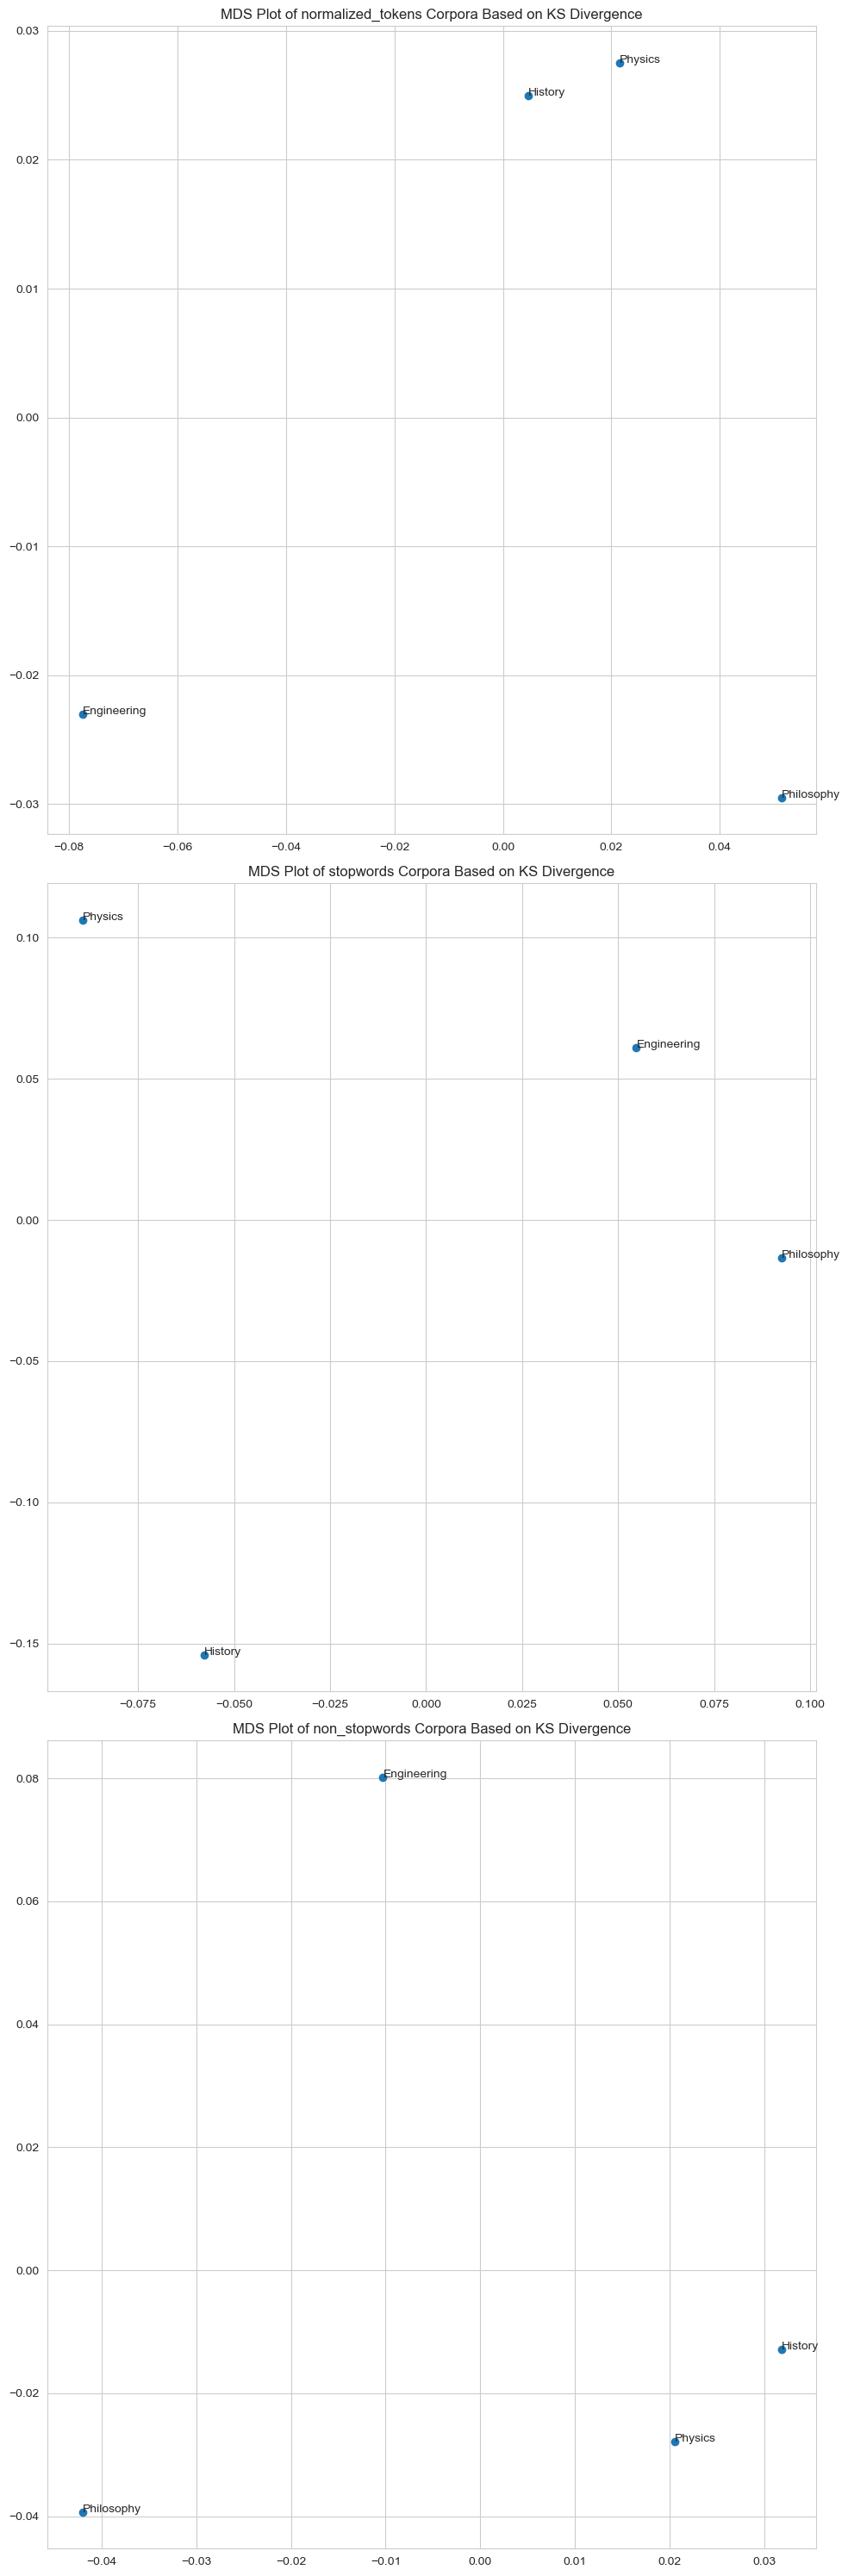

In [80]:
helper_functions.distributional_distance(abstract_corpus_concatenated, "KS", fieldsOfStudy, df_index) 

- Wasserstein distances and multidimensional scaling:

/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/samcong/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To sup

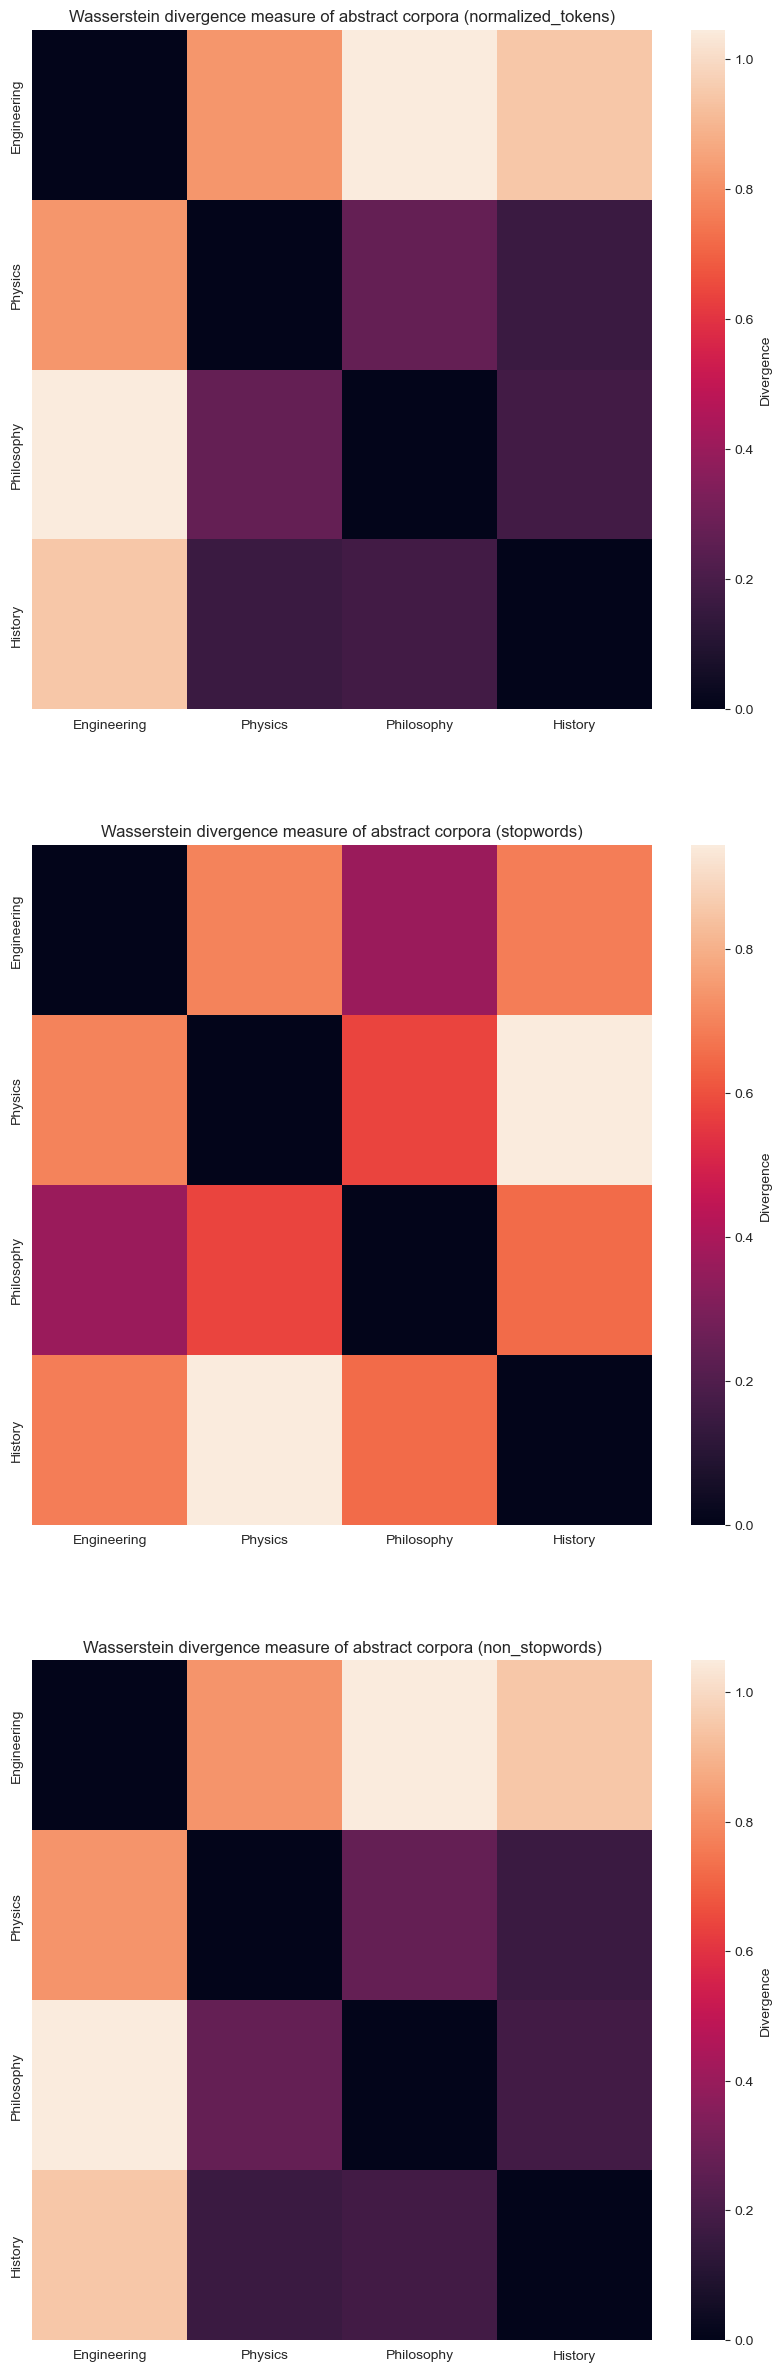

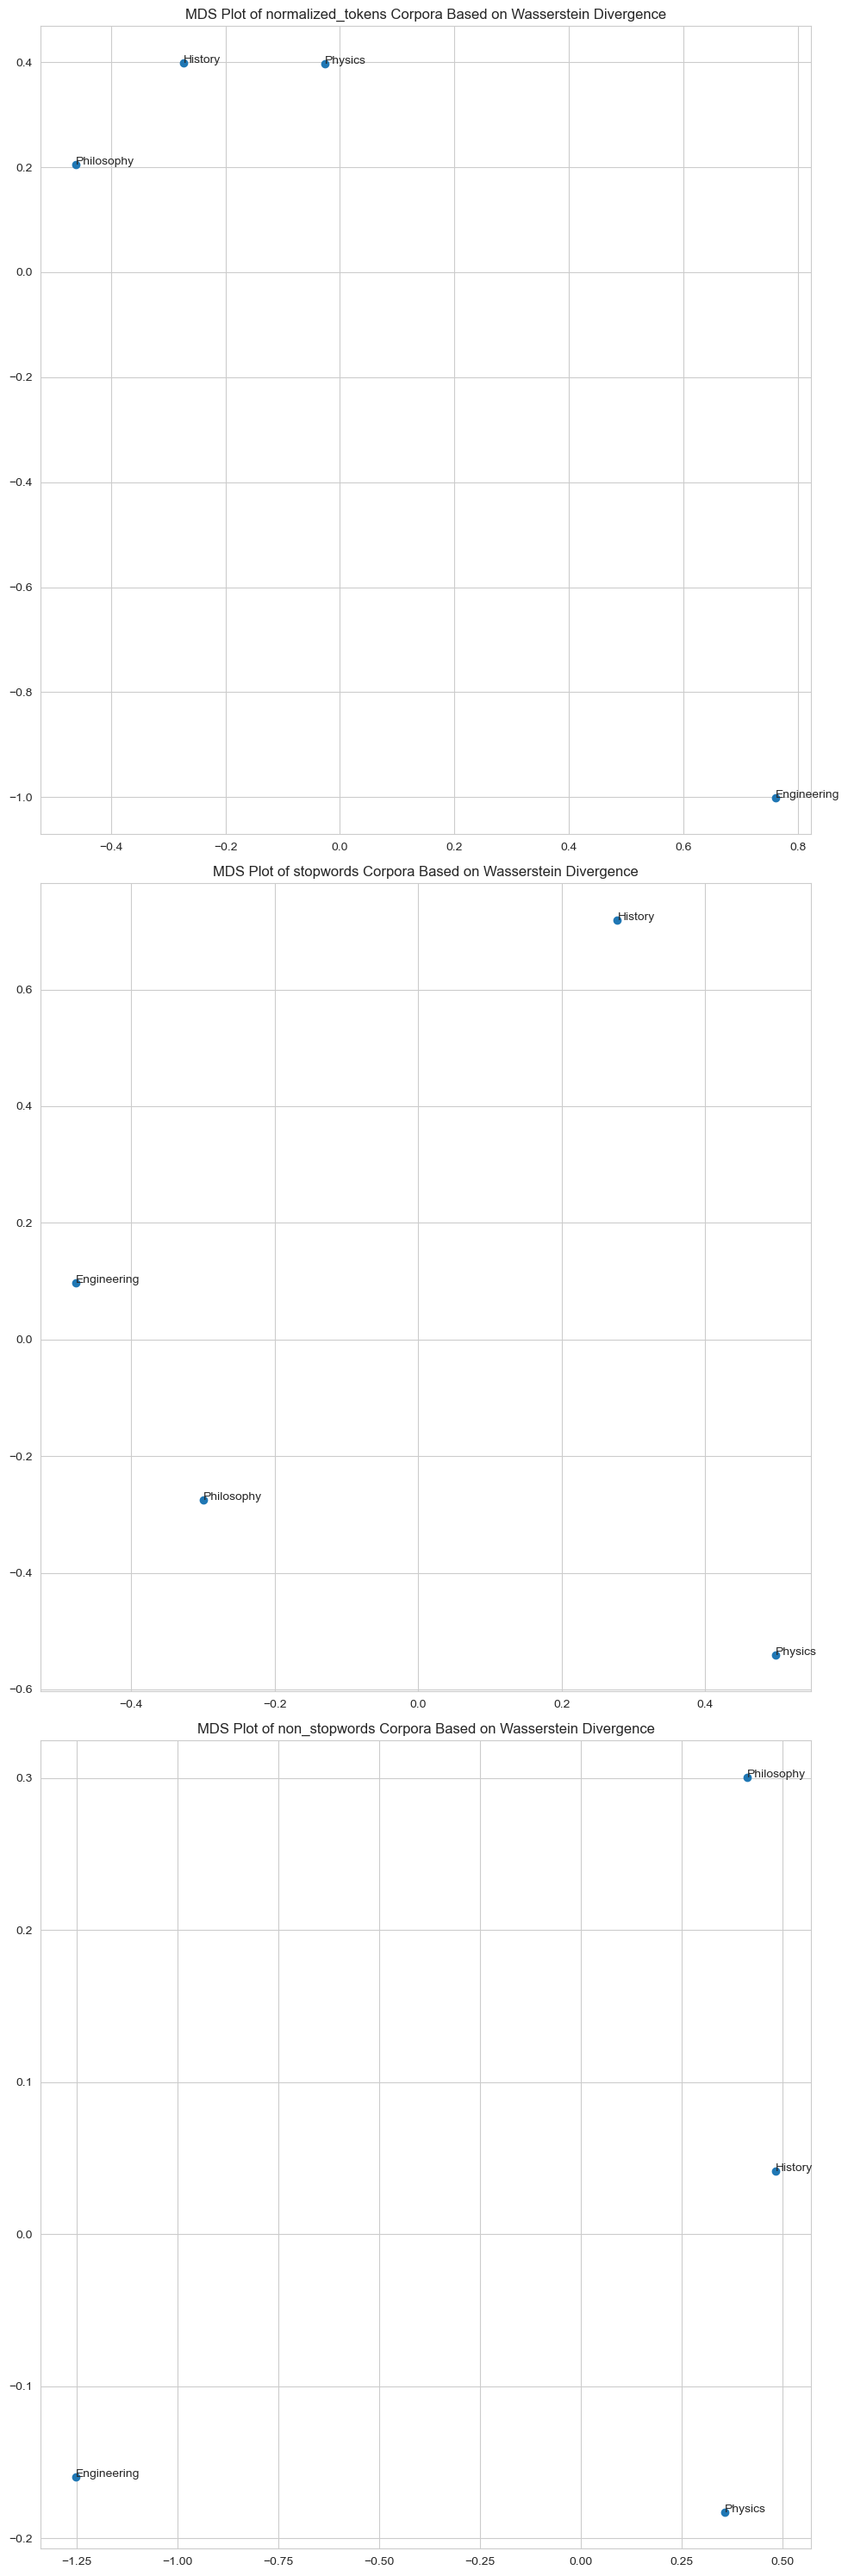

In [81]:
helper_functions.distributional_distance(abstract_corpus_concatenated, "Wasserstein", fieldsOfStudy, df_index) 